In [1]:
!nvidia-smi

Sun Dec  3 01:55:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 9.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip /content/gdrive/MyDrive/THESIS1/YOLOV8/YOLOV8-DOWNSAMPLED.zip -d .

Streaming output truncated to the last 5000 lines.
 extracting: ./YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/train/labels/hone_non_451_png.rf.d22c29edf8d1c2267fb99e8cf050b3fe.txt  
 extracting: ./YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/train/labels/hone_non_452_png.rf.bedc5d2f68ed9f7af07d9f28ab1c48a3.txt  
 extracting: ./YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/train/labels/hone_non_453_png.rf.bee3af79511f3684351660518d132ded.txt  
 extracting: ./YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/train/labels/hone_non_454_png.rf.a69acaddc9f3716e770732b5226244e2.txt  
 extracting: ./YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/train/labels/hone_non_456_png.rf.190d5cd00cedbee5a7bf9cd49a0b17ff.txt  
 extracting: ./YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/train/labels/hone_non_457_png.rf.db18cab351835c8fd843f66b3a3c2ffc.txt  
 extracting: ./YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/train/labels/hone_non_459_png.rf.0e0da02f2a2784b674a1f45685f1c

In [5]:
import ultralytics
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
ultralytics.checks()

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 28.2/166.8 GB disk)


Filtering and Label Copying Completed.


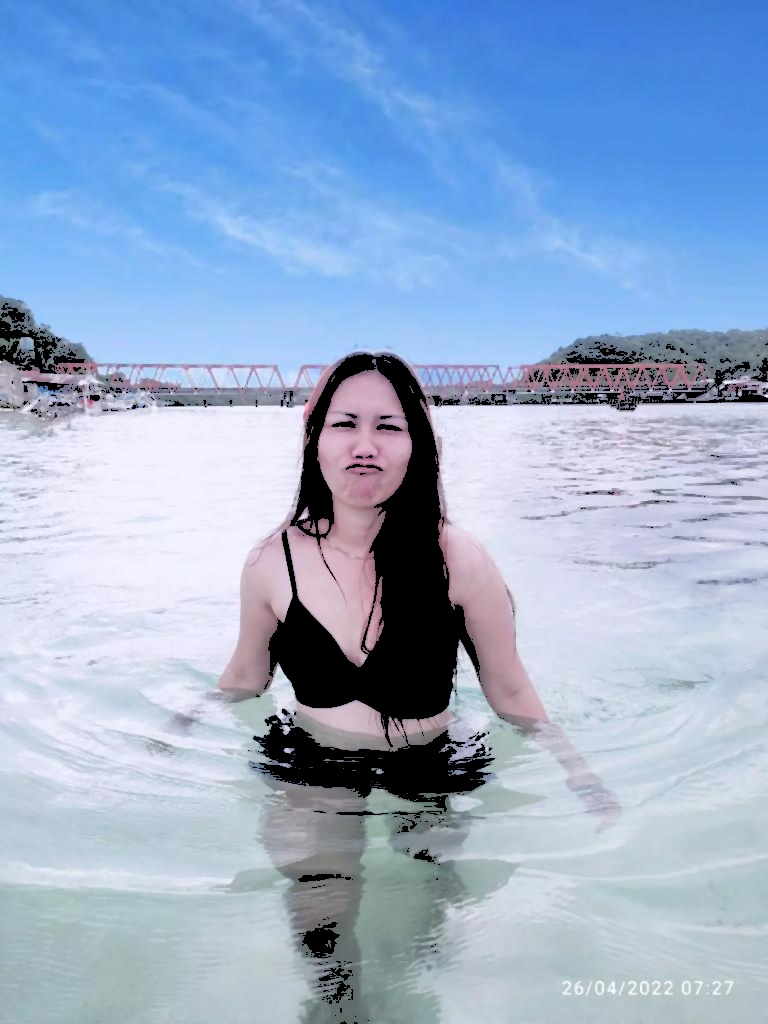

In [6]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import shutil

# Function for decision-based median filter
def decision_based_median_filter(image, threshold):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a simple decision based on pixel intensity
    binary_mask = (gray > threshold).astype(np.uint8) * 255

    # Convert the binary mask to 3 channels to match the input image
    binary_mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)

    # Apply median filter only to the selected regions
    result = cv2.medianBlur(image, 3)  # You can adjust the kernel size as needed

    # Mask out regions where the decision was not met
    result = cv2.bitwise_and(result, binary_mask)

    return result

# Path to your dataset folder containing images and labels
dataset_folder = '/content/YOLOV8Dataset.downsample/YOLOV8Dataset.downsample'

# Set the threshold for the decision-based filter
threshold = 100  # You can adjust this threshold value

# Output folder for filtered images and labels
output_folder = '/content/output'
os.makedirs(output_folder, exist_ok=True)

# Iterate through images in the dataset folder and its subfolders
for split_folder in ['train', 'valid', 'test']:
    split_folder_path = os.path.join(dataset_folder, split_folder)

    for root, dirs, files in os.walk(split_folder_path):
        for filename in files:
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Load the image
                image_path = os.path.join(root, filename)
                img = cv2.imread(image_path)

                # Apply the decision-based median filter
                filtered_img = decision_based_median_filter(img, threshold)

                # Save the result to the output folder
                relative_path = os.path.relpath(image_path, dataset_folder)
                output_path = os.path.join(output_folder, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                cv2.imwrite(output_path, filtered_img)

# Copy label files
source_base_path = "/content/YOLOV8Dataset.downsample/YOLOV8Dataset.downsample"
output_base_path = "/content/output"

# List of folders to copy (test, train, valid)
folders_to_copy = ["test", "train", "valid"]

# Loop through each folder and copy labels
for folder in folders_to_copy:
    source_labels_path = os.path.join(source_base_path, folder, "labels")
    output_labels_path = os.path.join(output_base_path, folder, "labels")

    # Create destination folder if it doesn't exist
    os.makedirs(output_labels_path, exist_ok=True)

    # Loop through each file in the source directory and copy it individually
    for filename in os.listdir(source_labels_path):
        source_file_path = os.path.join(source_labels_path, filename)
        output_file_path = os.path.join(output_labels_path, filename)
        shutil.copy2(source_file_path, output_file_path)

print("Filtering and Label Copying Completed.")


# Display one of the filtered images
sample_image_filename = "train/images/clfa_face_101_png.rf.91e56c308359418520cd71a8fc0d0fb7.jpg"  # Replace with the actual filename
sample_image_path = os.path.join(output_folder, sample_image_filename)

sample_image = cv2.imread(sample_image_path)

if sample_image is not None:
    cv2_imshow(sample_image)
else:
    print(f"Image not found: {sample_image_path}")


In [7]:
from ultralytics import YOLO

# Initialize the YOLOv8 model with the checkpoint file
model = YOLO('yolov8m.pt')

# Specify the path to your data.yaml file after unzipping the archive
data_yaml_path = '/content/YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/data.yaml'

# Start training with your des`ired settings
model.train(data=data_yaml_path, epochs=20, imgsz=768, batch=8, patience=False, deterministic=False, close_mosaic=0, lrf=0.0, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, translate=0.0, scale=0.0, fliplr=0.0, weight_decay=0.0, momentum=0.0)


100%|██████████| 49.7M/49.7M [00:00<00:00, 330MB/s]


Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/data.yaml, epochs=20, patience=False, batch=8, imgsz=768, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=False, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 43.7MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 202MB/s]


AMP: checks passed ✅


train: Scanning /content/output/train/labels... 6999 images, 3511 backgrounds, 0 corrupt: 100%|██████████| 6999/6999 [00:05<00:00, 1324.60it/s]


train: New cache created: /content/output/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7013, len(boxes) = 9330. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/output/valid/labels... 1503 images, 1051 backgrounds, 0 corrupt: 100%|██████████| 1503/1503 [00:01<00:00, 1385.05it/s]


val: New cache created: /content/output/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 929, len(boxes) = 1211. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.0' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0), 83 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.95G      1.337      2.219      1.435         15        768: 100%|██████████| 875/875 [02:09<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:09<00:00,  9.56it/s]

                   all       1503       1211      0.602      0.651      0.635      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.16G      1.399      1.519      1.468         18        768: 100%|██████████| 875/875 [02:00<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.29it/s]

                   all       1503       1211       0.67      0.617      0.632      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.18G      1.349      1.411      1.432         18        768: 100%|██████████| 875/875 [01:58<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 10.85it/s]

                   all       1503       1211      0.706      0.629      0.648      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.21G      1.282      1.319      1.386          8        768: 100%|██████████| 875/875 [01:57<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 10.88it/s]

                   all       1503       1211      0.763      0.674      0.724      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.22G      1.207      1.194      1.332         13        768: 100%|██████████| 875/875 [01:57<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.17it/s]

                   all       1503       1211      0.743      0.735      0.746      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.18G      1.139      1.108      1.282         11        768: 100%|██████████| 875/875 [01:57<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.53it/s]

                   all       1503       1211      0.752      0.716       0.76      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.17G      1.104      1.128      1.272          9        768: 100%|██████████| 875/875 [01:58<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.24it/s]

                   all       1503       1211      0.823      0.735      0.783      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.22G      1.058       1.02      1.235         13        768: 100%|██████████| 875/875 [01:58<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 10.69it/s]

                   all       1503       1211      0.791      0.757      0.801      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.19G      1.018      0.952      1.202          7        768: 100%|██████████| 875/875 [01:57<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 10.76it/s]

                   all       1503       1211      0.793       0.78      0.794      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.22G     0.9975     0.9443      1.201         22        768: 100%|██████████| 875/875 [01:58<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.06it/s]

                   all       1503       1211      0.812      0.768      0.804      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.15G     0.9525     0.8783      1.171          7        768: 100%|██████████| 875/875 [01:58<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.27it/s]

                   all       1503       1211      0.794      0.798      0.819      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.18G     0.9314     0.8794      1.163         16        768: 100%|██████████| 875/875 [01:57<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.16it/s]

                   all       1503       1211      0.805       0.78      0.828      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       5.2G     0.9022       0.83      1.145          7        768: 100%|██████████| 875/875 [01:57<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 10.97it/s]

                   all       1503       1211      0.802      0.808      0.828       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.15G     0.8784     0.7898      1.125         15        768: 100%|██████████| 875/875 [01:57<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.03it/s]


                   all       1503       1211      0.831      0.794      0.838       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.19G     0.8554     0.7734      1.118          9        768: 100%|██████████| 875/875 [01:57<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.48it/s]

                   all       1503       1211      0.827      0.794       0.84      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.21G      0.815     0.7239      1.087          8        768: 100%|██████████| 875/875 [01:58<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.53it/s]

                   all       1503       1211      0.835      0.814      0.844       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.21G     0.7894     0.6943      1.082         14        768: 100%|██████████| 875/875 [01:57<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.41it/s]

                   all       1503       1211      0.819      0.832      0.847      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.22G      0.767      0.673      1.065         11        768: 100%|██████████| 875/875 [01:58<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.38it/s]

                   all       1503       1211      0.828      0.811      0.846      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.14G     0.7555      0.671      1.056         25        768: 100%|██████████| 875/875 [01:57<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:08<00:00, 11.41it/s]

                   all       1503       1211      0.815      0.834      0.851      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.17G     0.7096     0.6234      1.032          7        768: 100%|██████████| 875/875 [01:58<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:07<00:00, 11.91it/s]

                   all       1503       1211      0.859      0.795      0.855      0.669



20 epochs completed in 0.717 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:09<00:00,  9.48it/s]


                   all       1503       1211      0.858      0.795      0.855      0.669
               Barcode       1503        411      0.872      0.827      0.873      0.742
          BuyerDetails       1503        161      0.871      0.826        0.9      0.781
                  Face       1503        240      0.917      0.846       0.91      0.626
                QRCode       1503        206      0.865      0.776      0.812      0.679
            TrackingID       1503        193      0.768      0.702      0.782      0.517
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea3e898e8f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

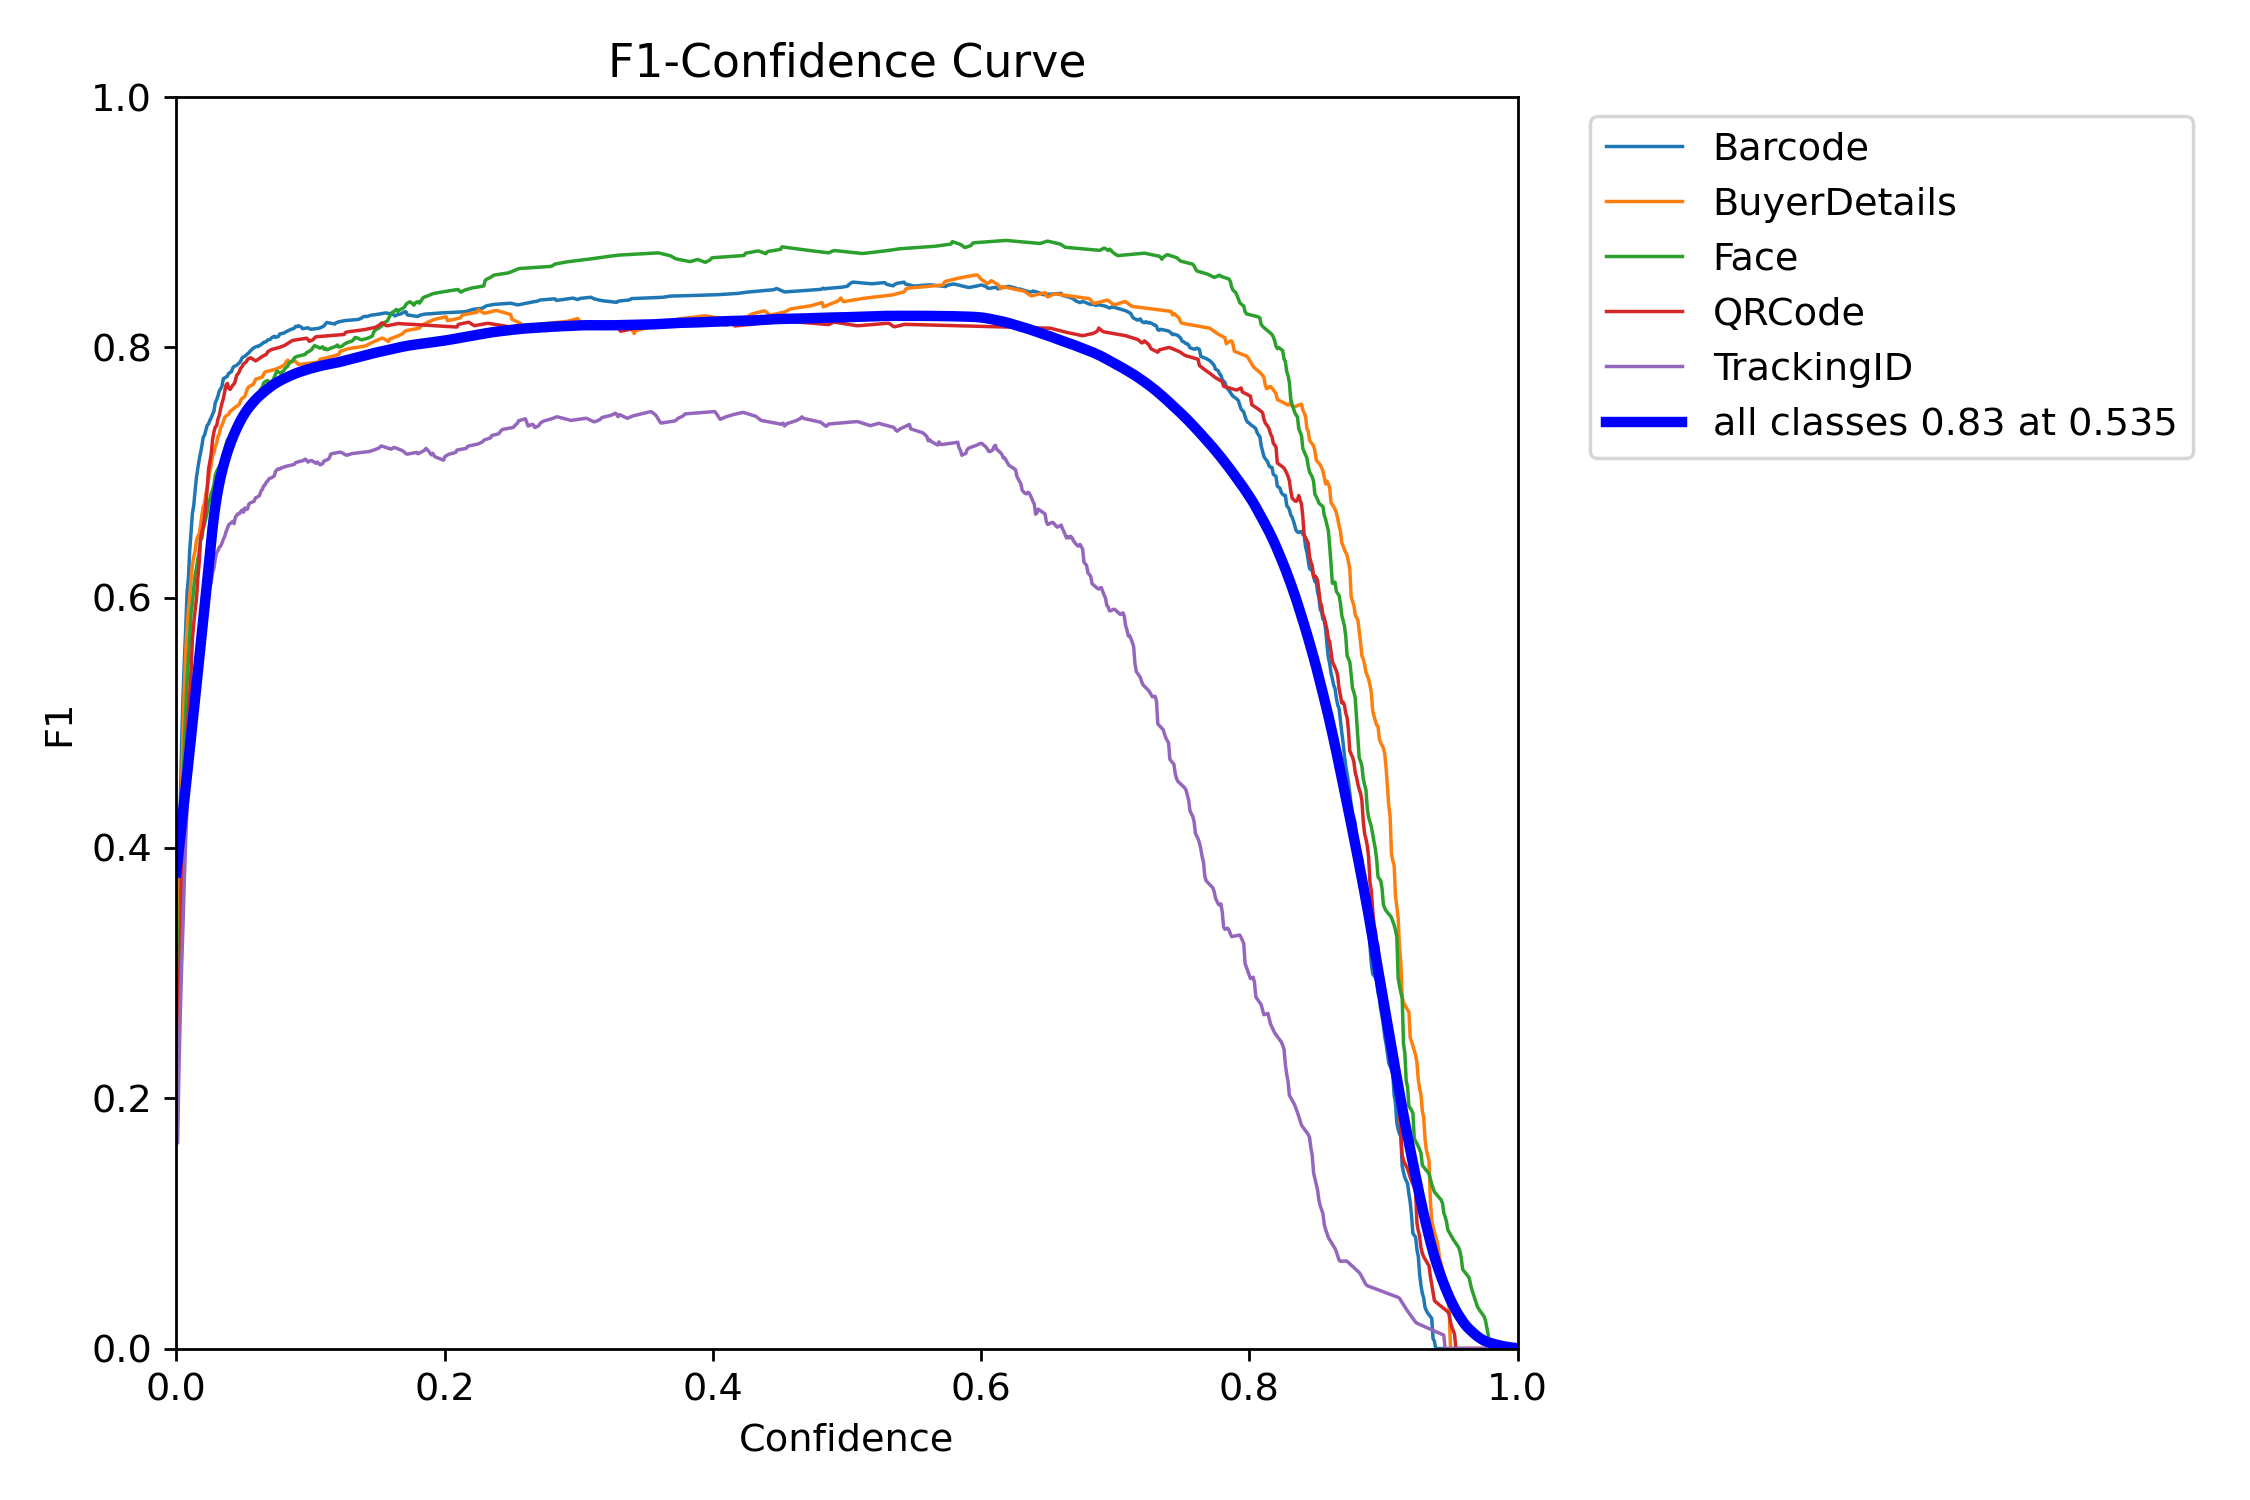

In [8]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=600)

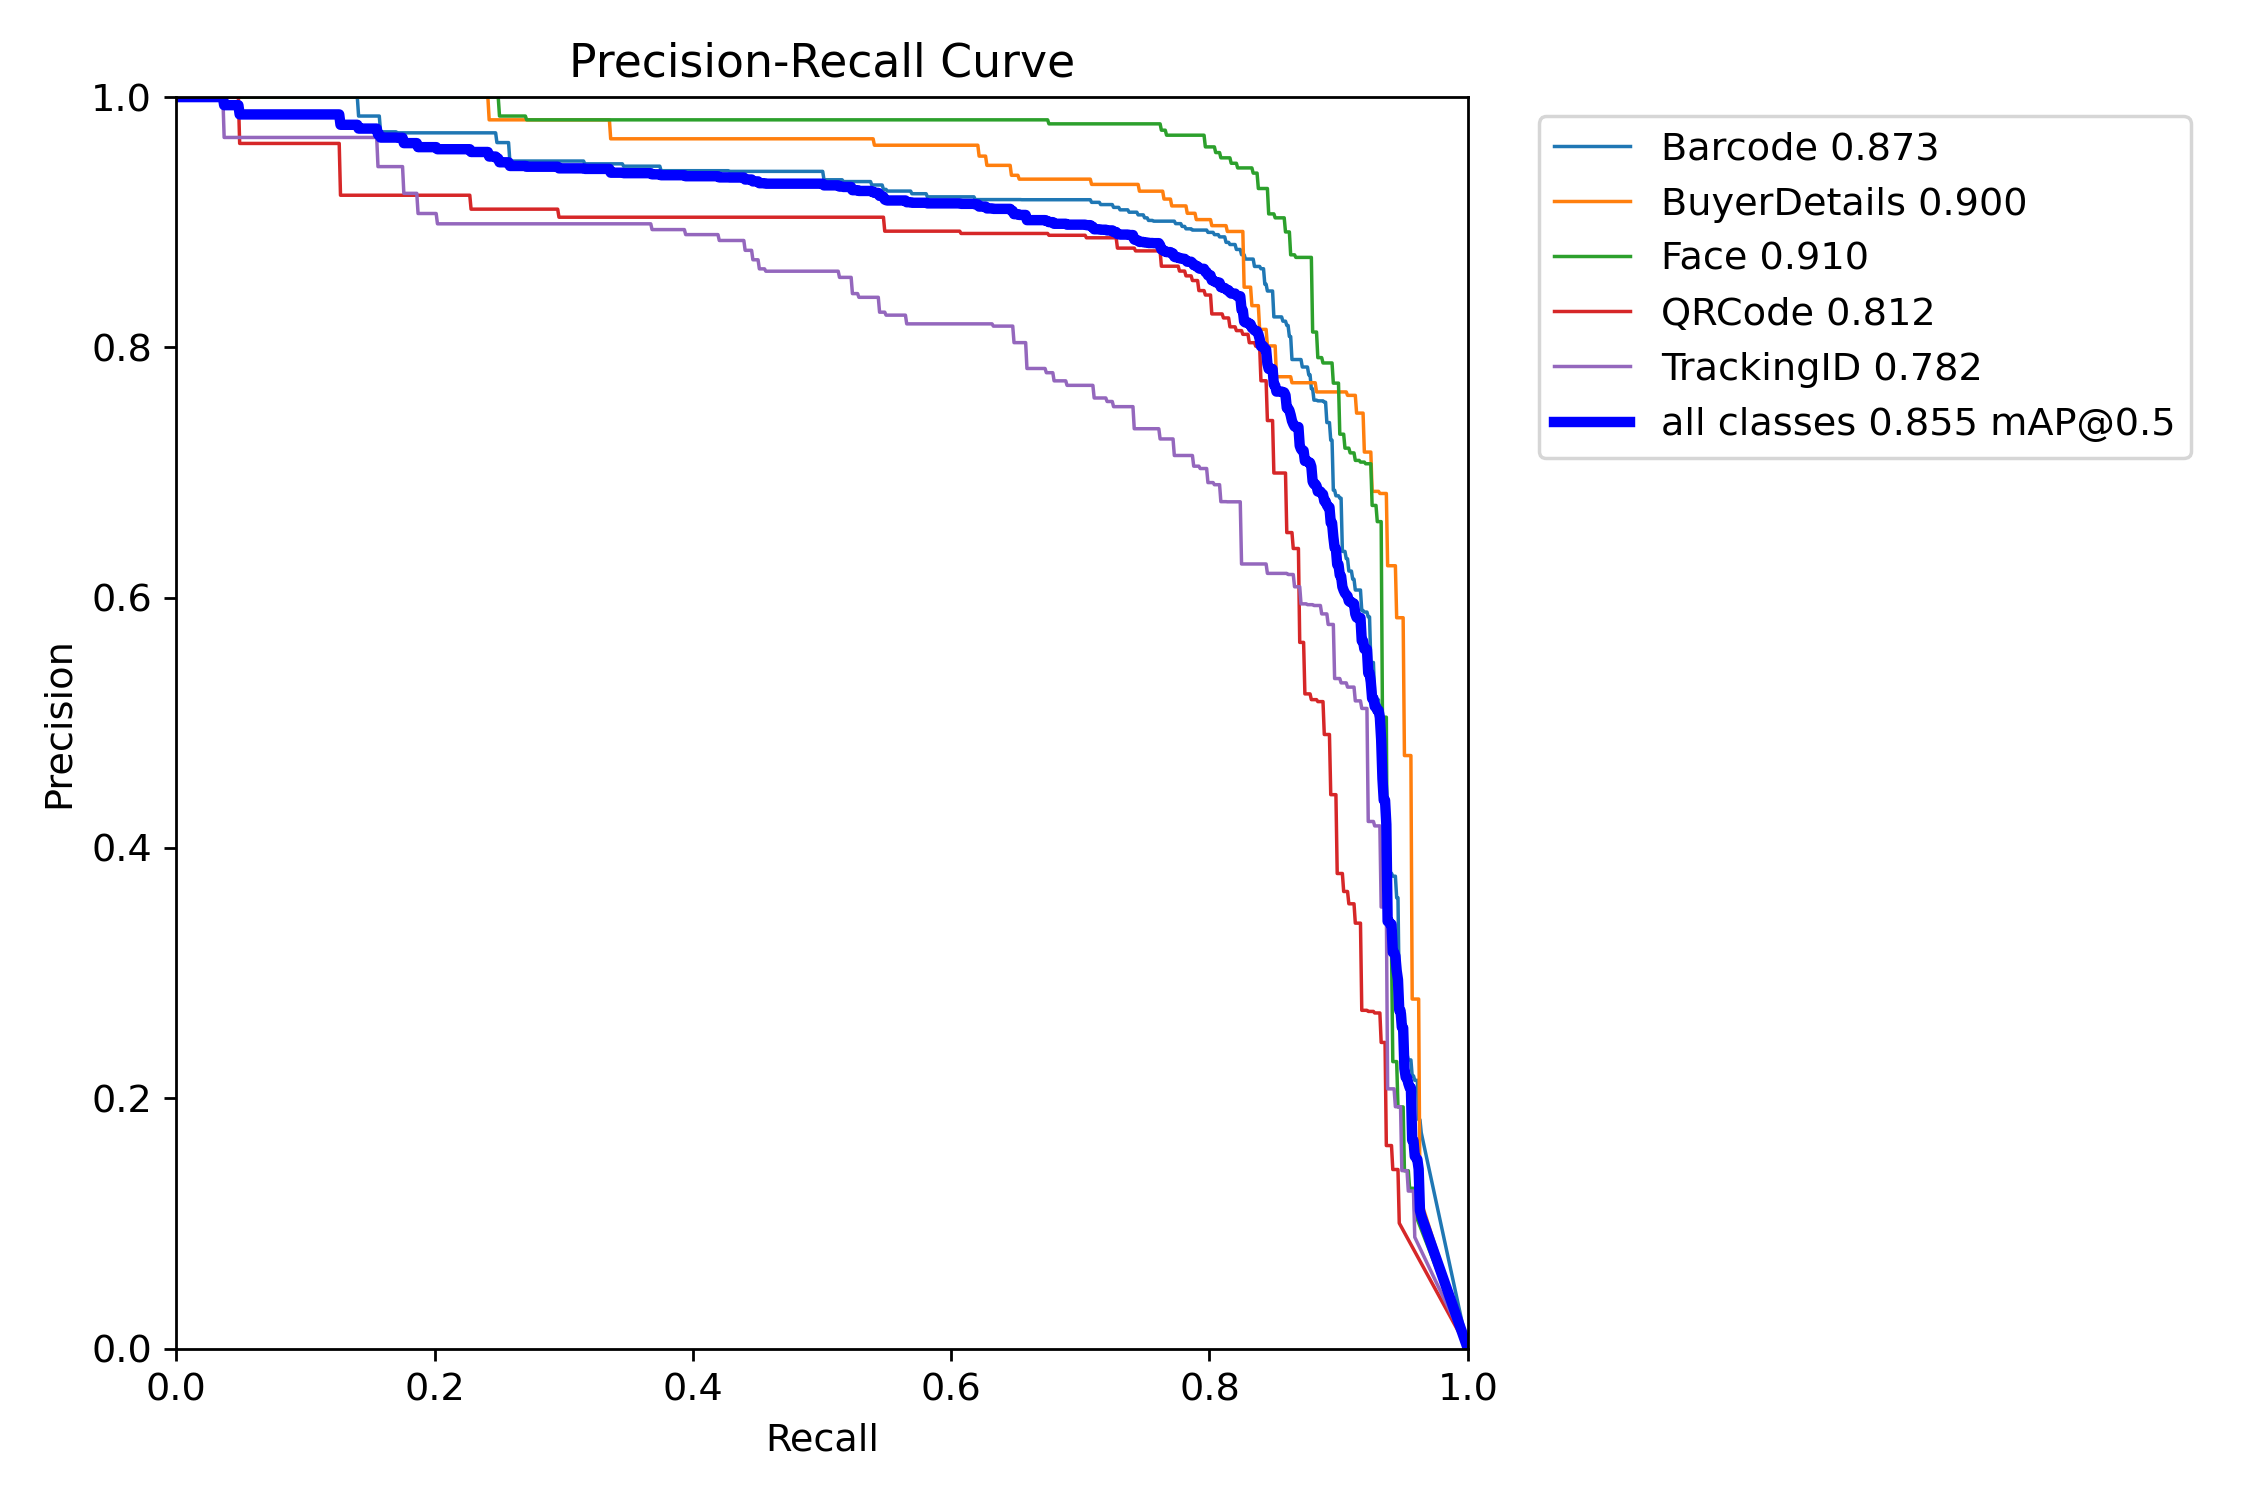

In [9]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)

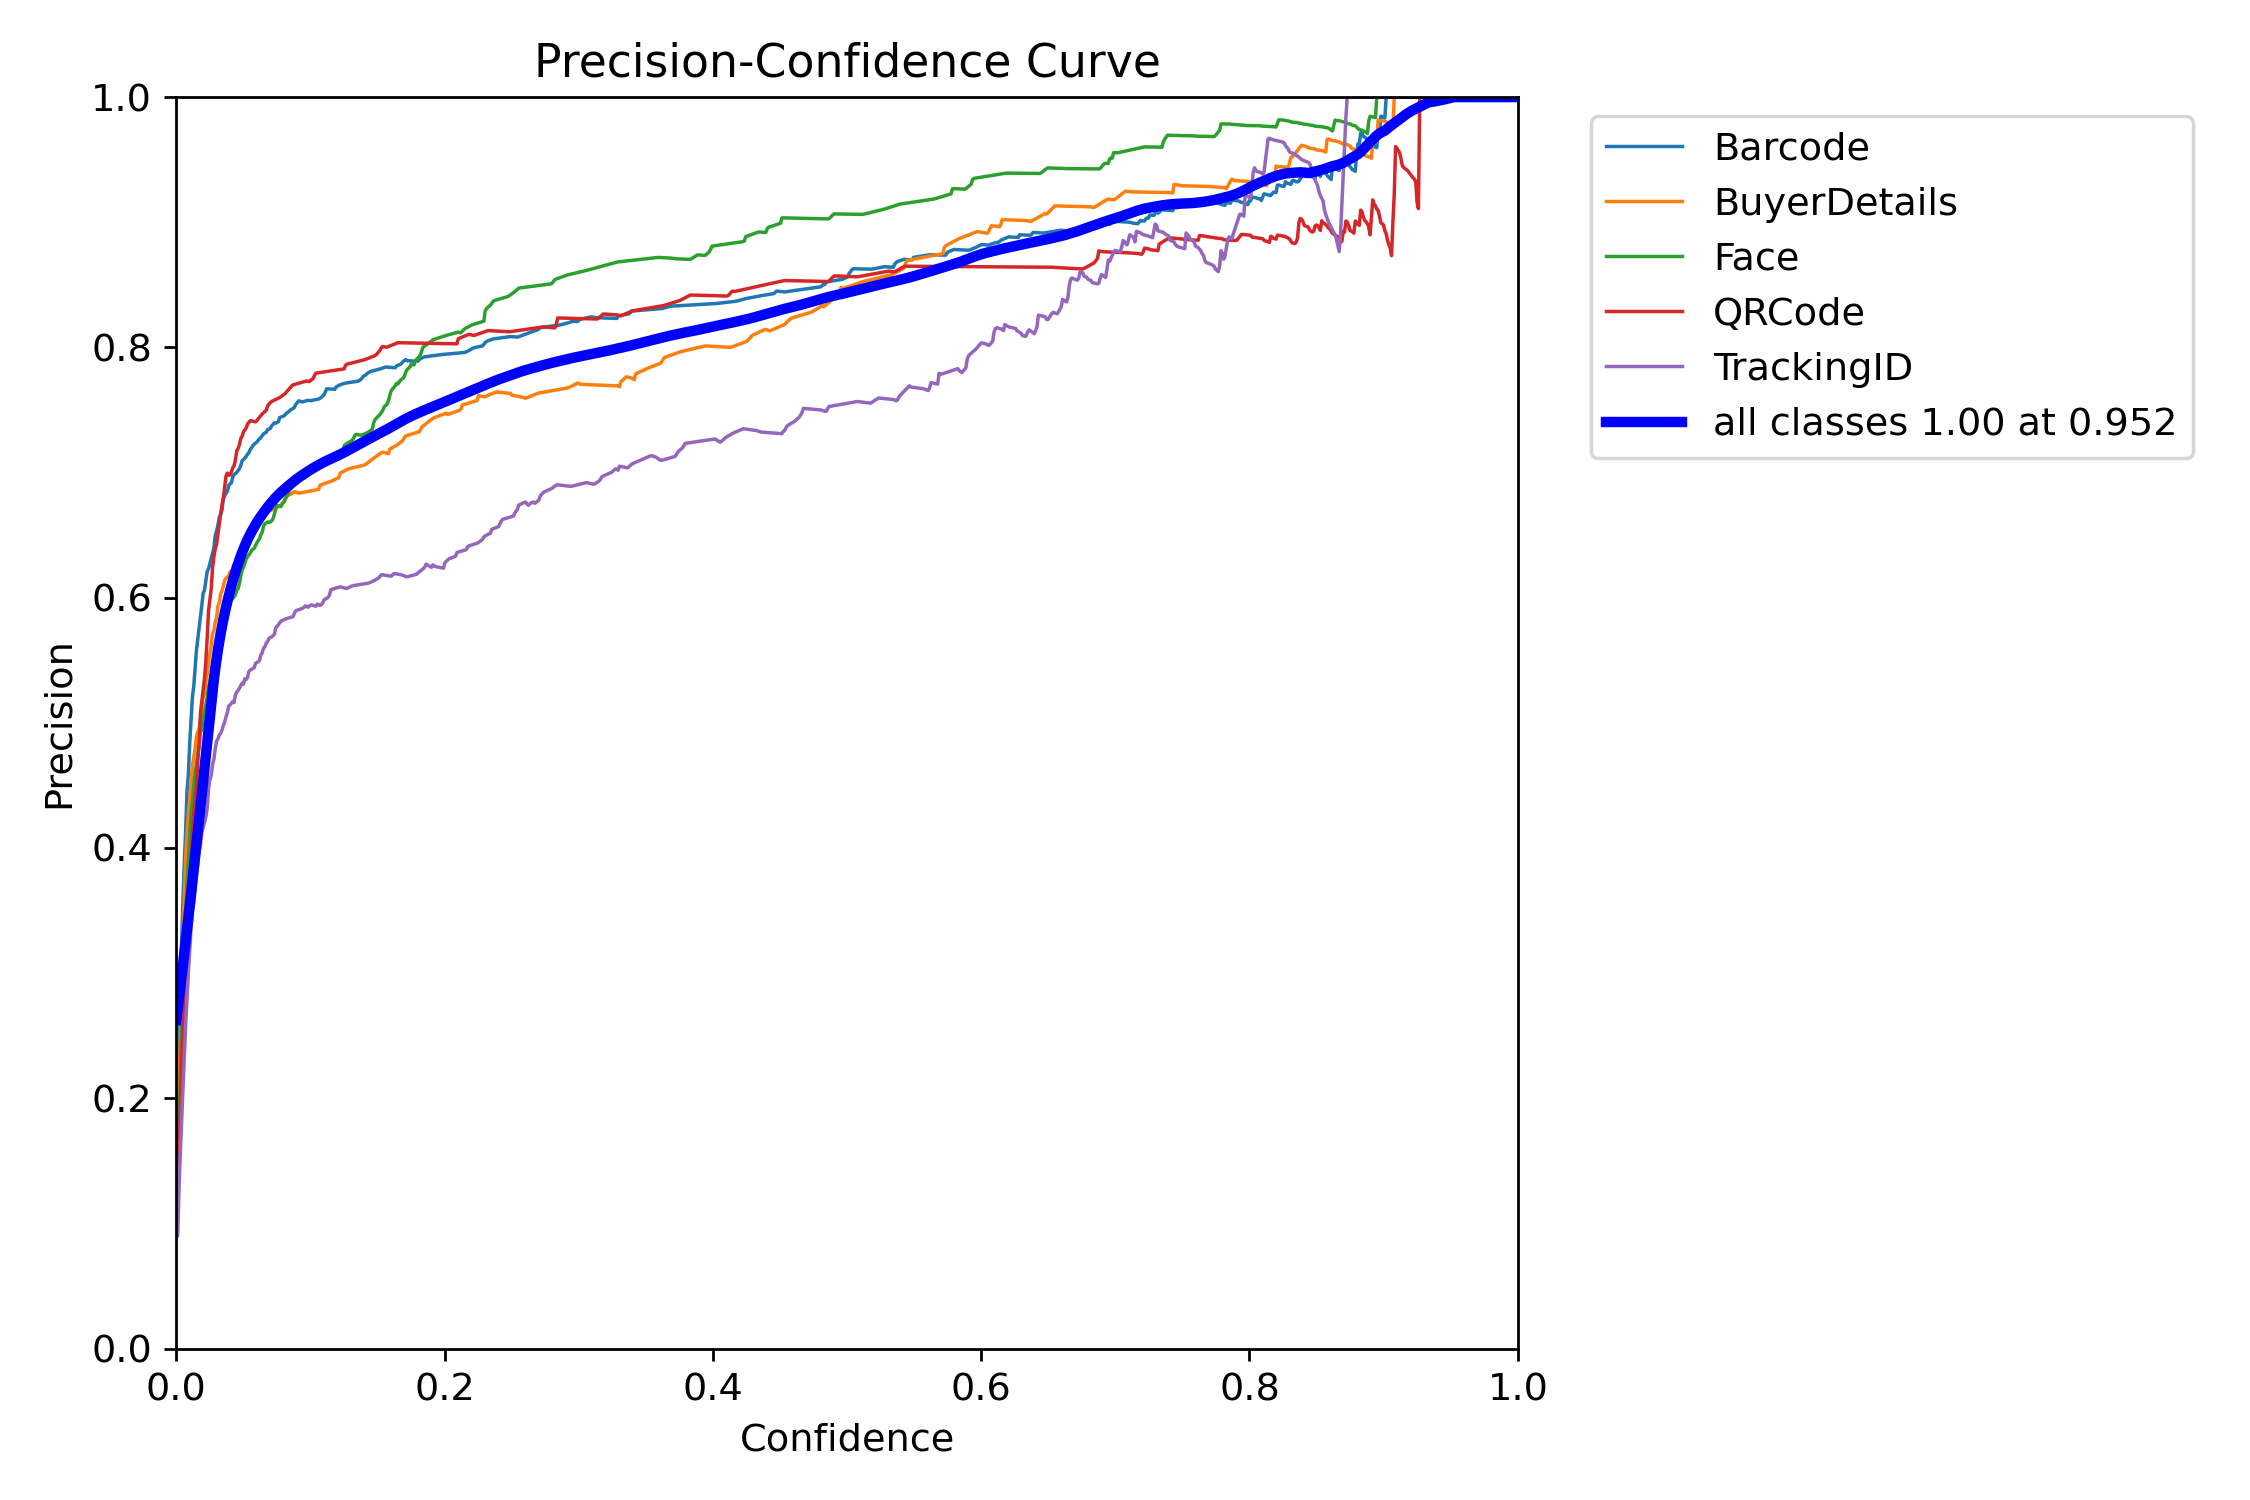

In [10]:
Image(filename=f'/content/runs/detect/train/P_curve.png', width=600)

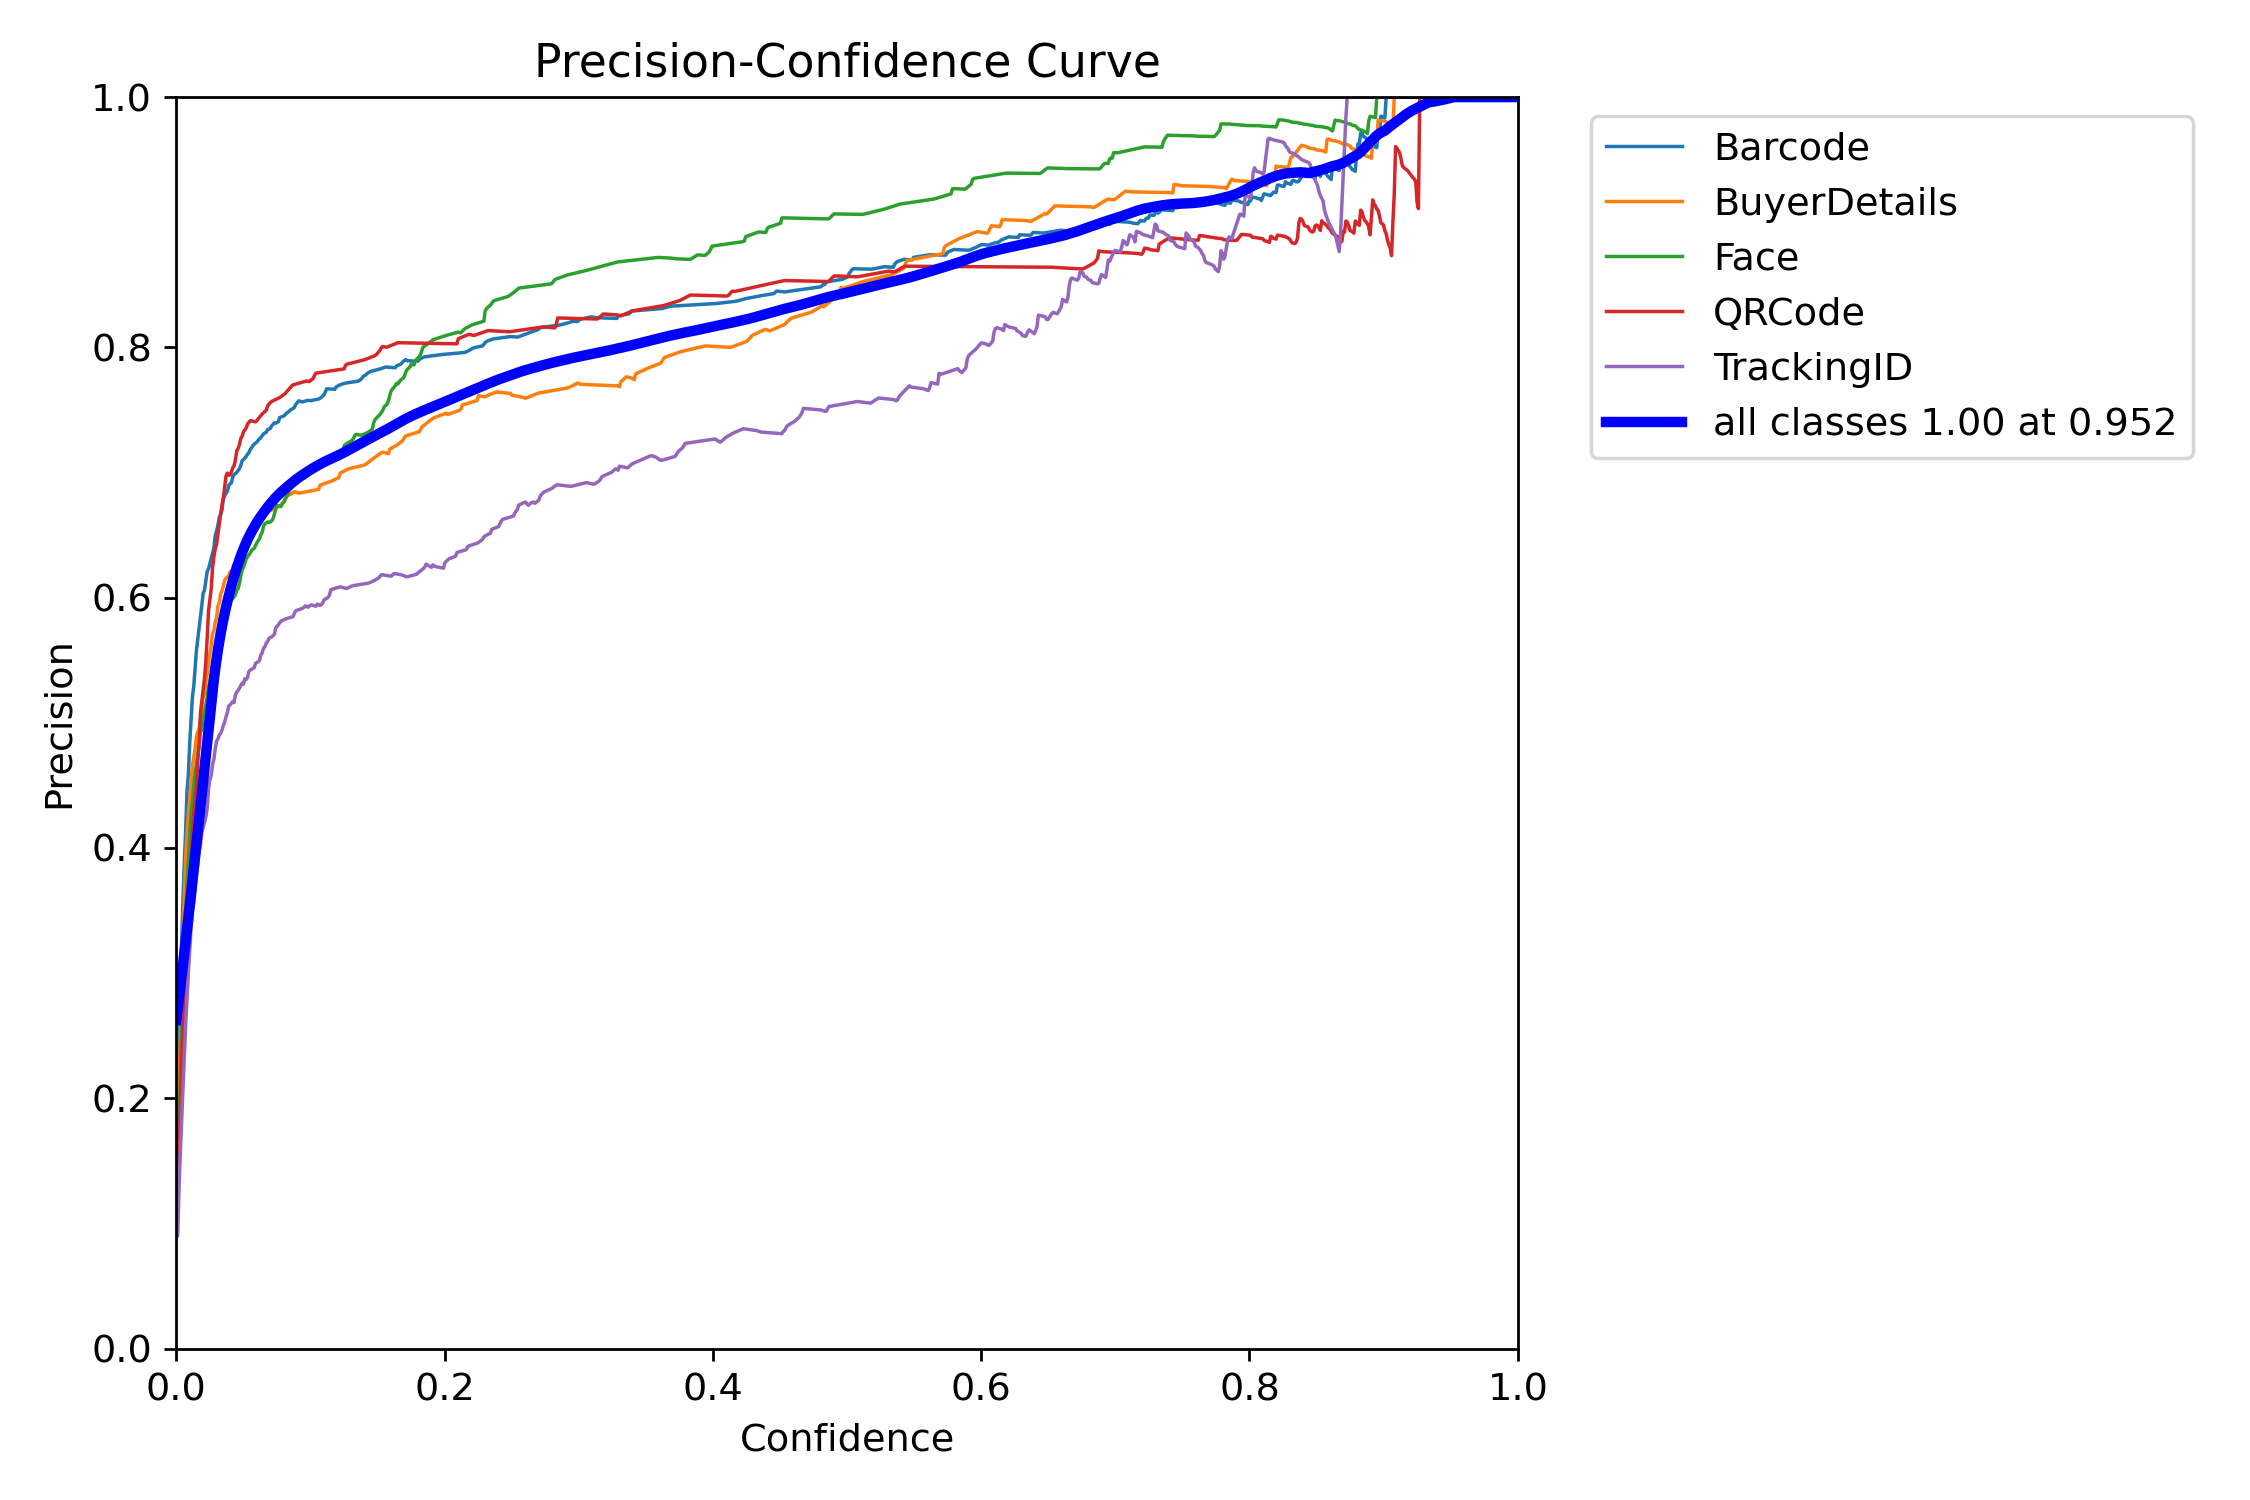

In [11]:
Image(filename=f'/content/runs/detect/train/P_curve.png', width=600)

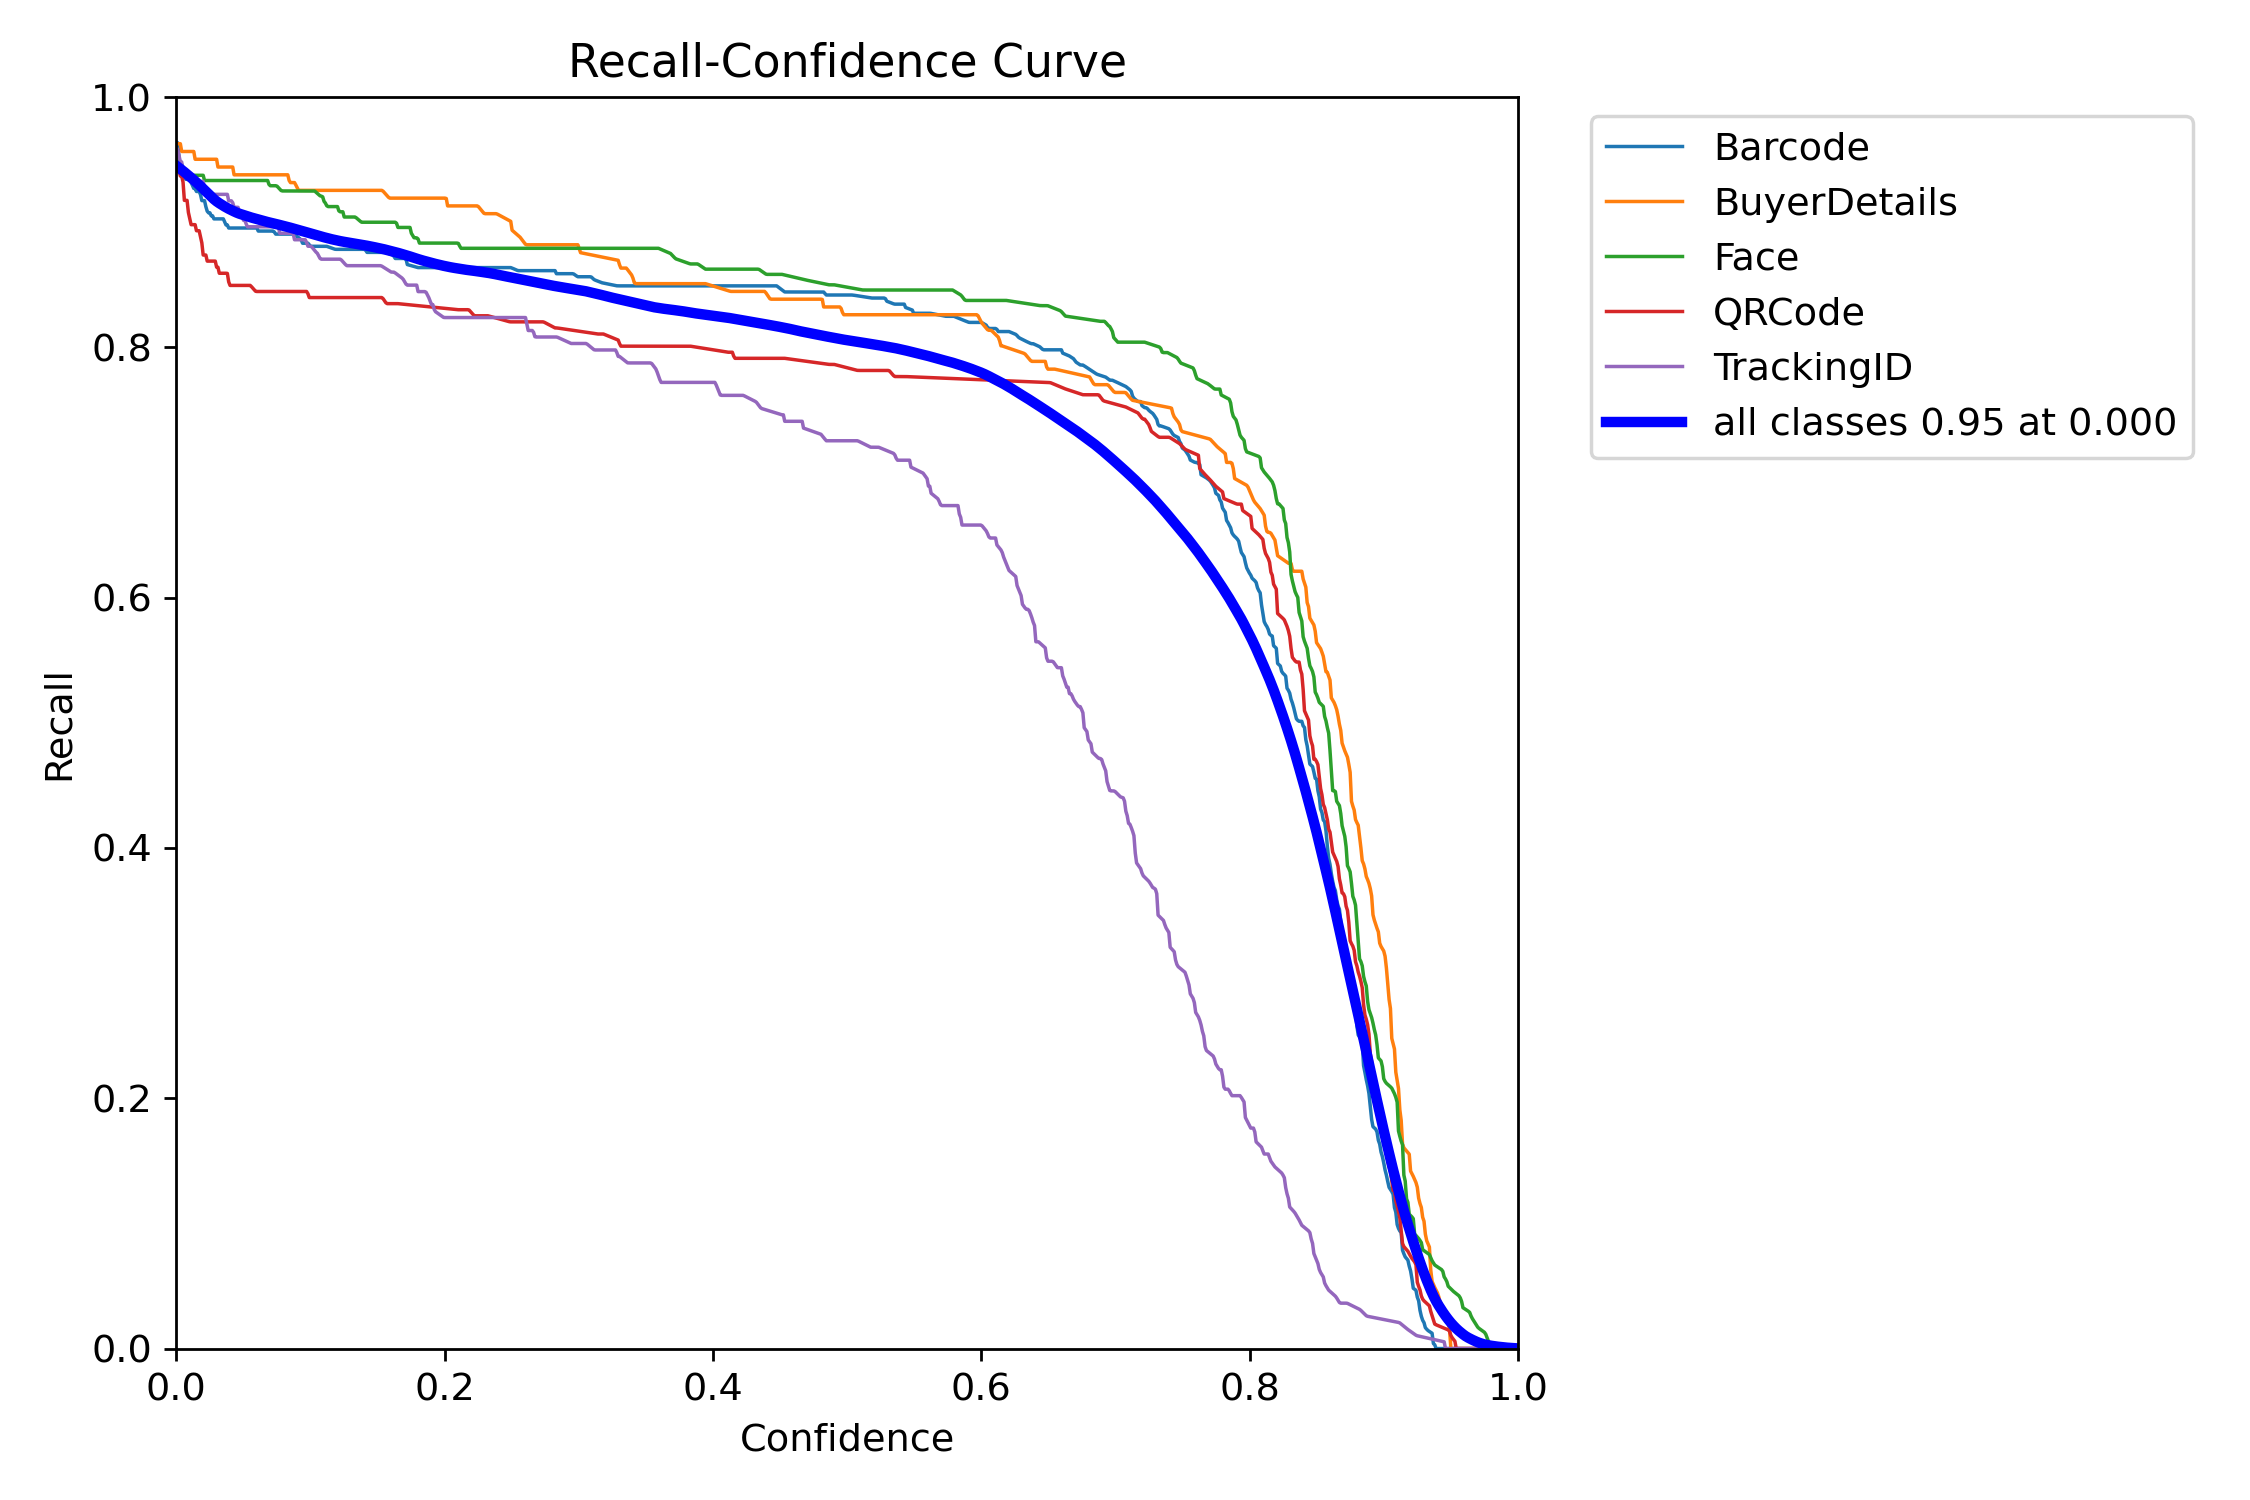

In [12]:
Image(filename=f'/content/runs/detect/train/R_curve.png', width=600)

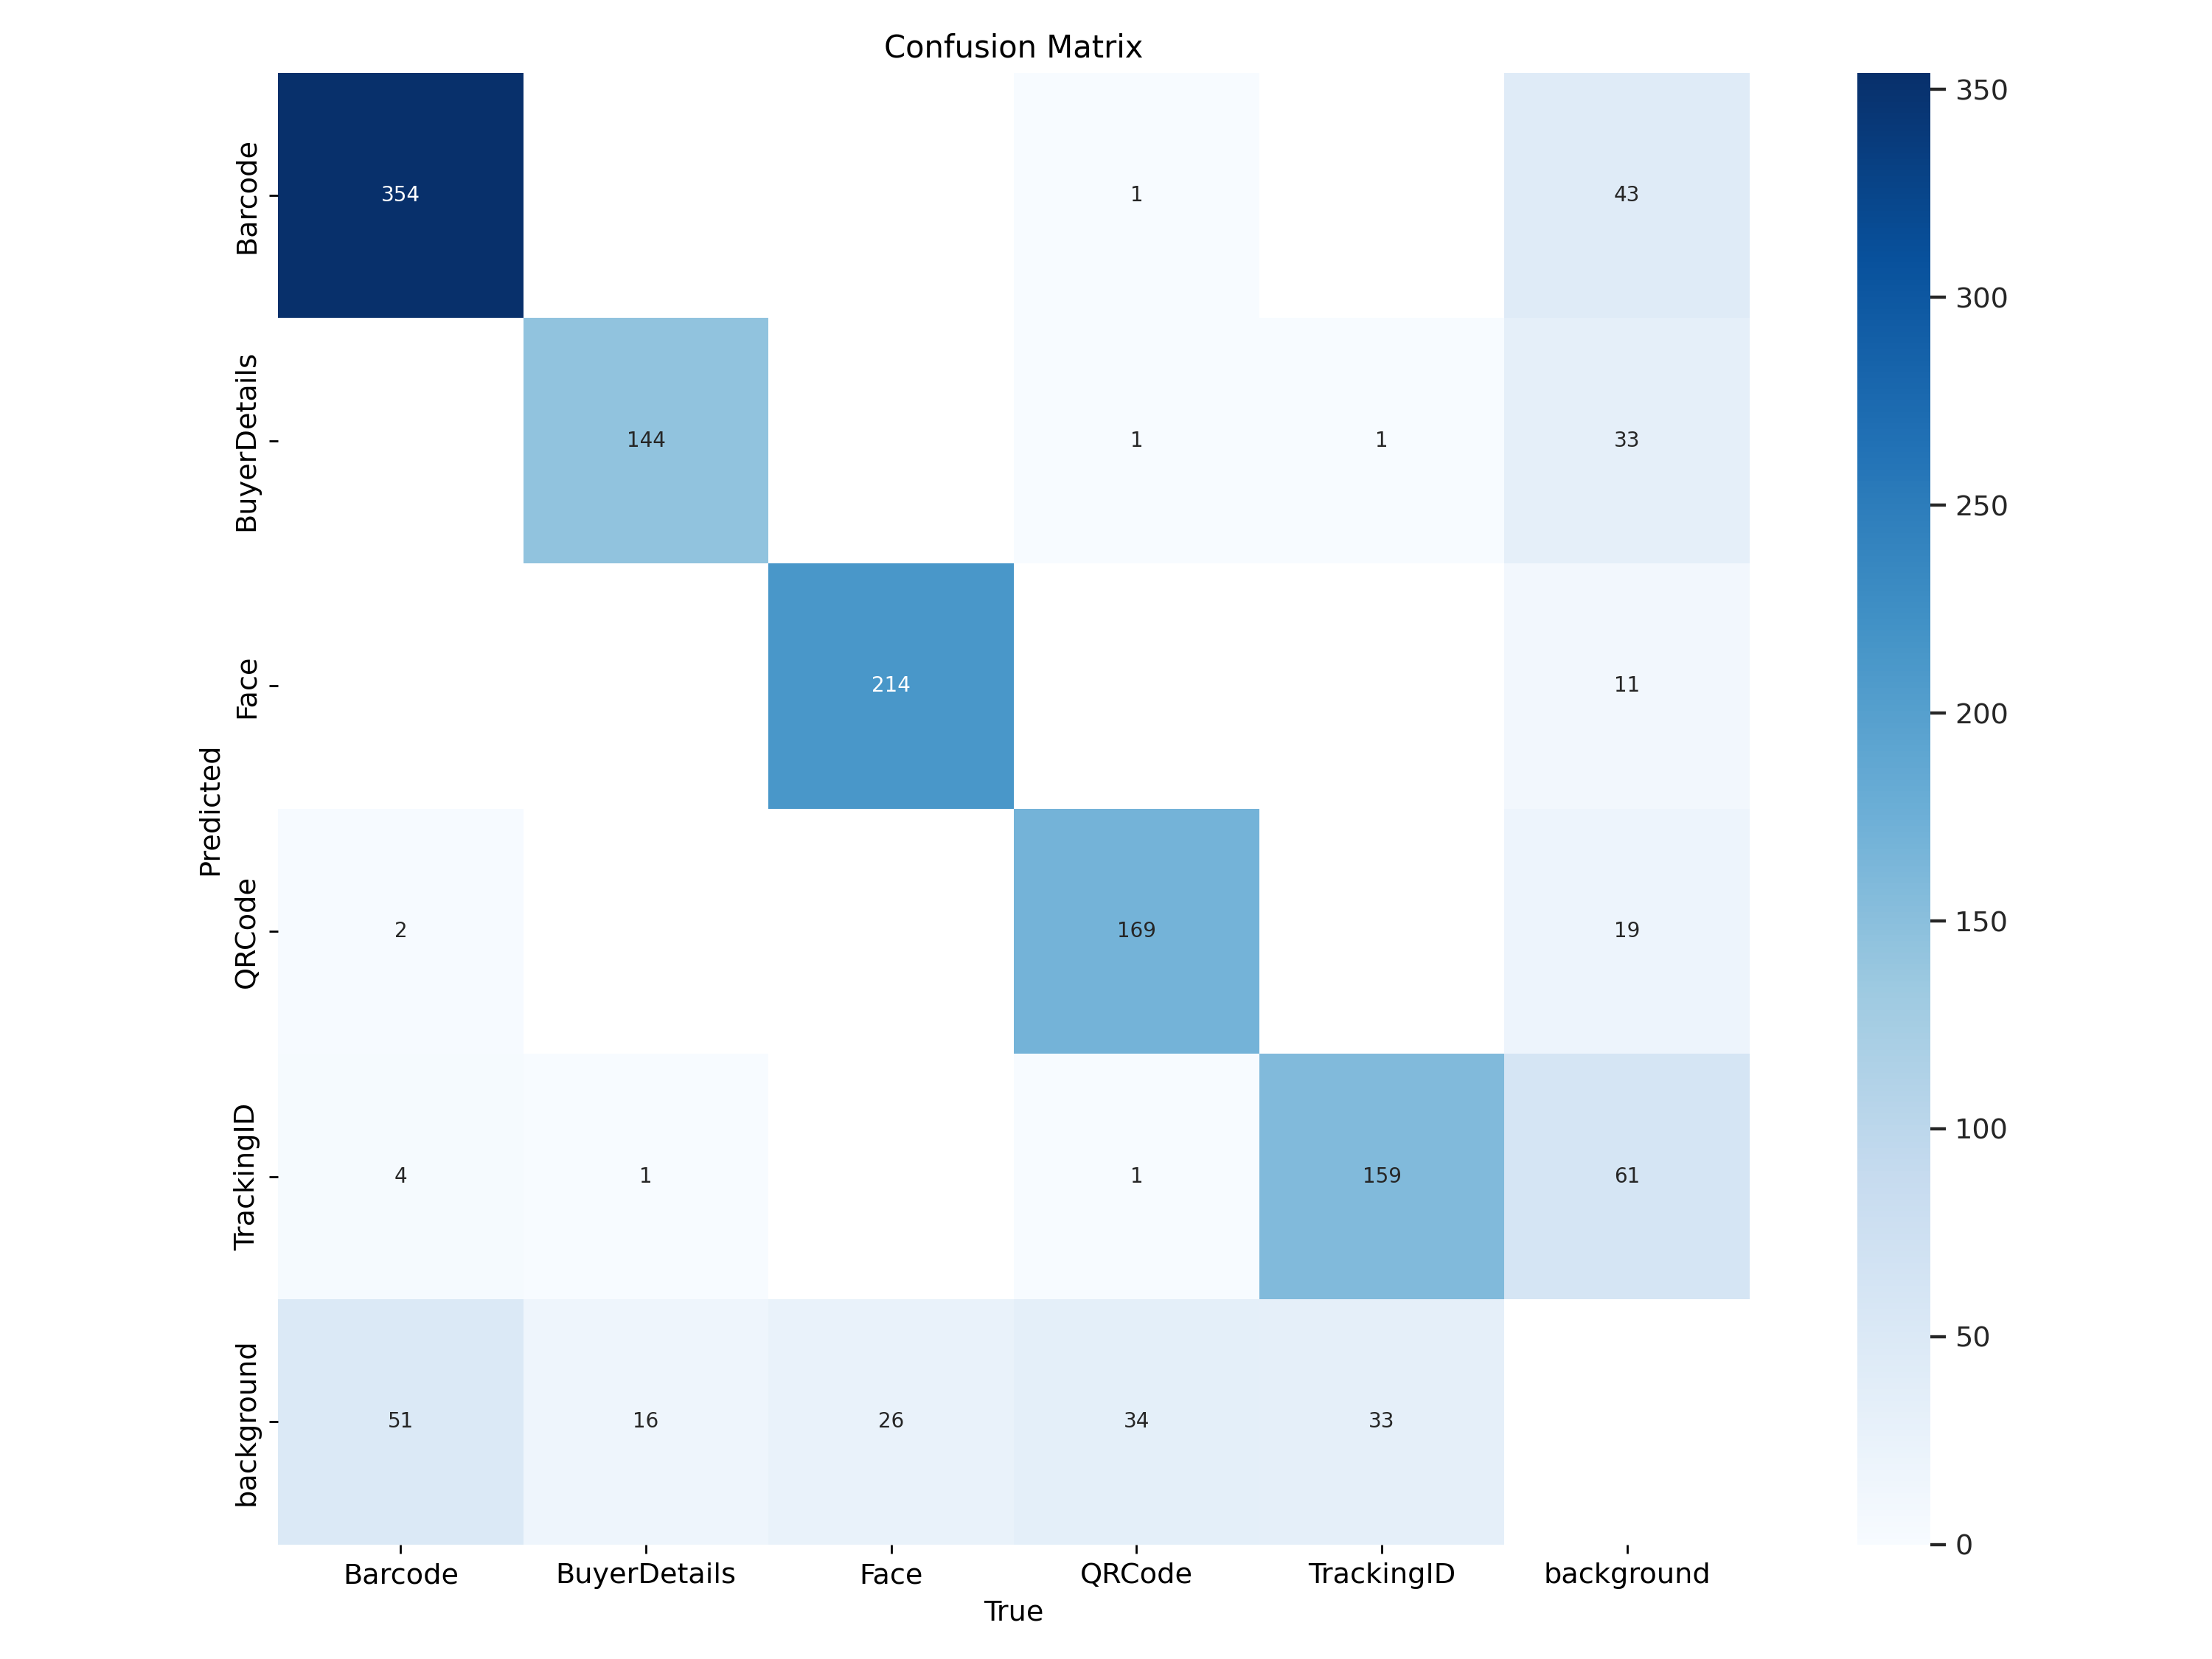

In [13]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

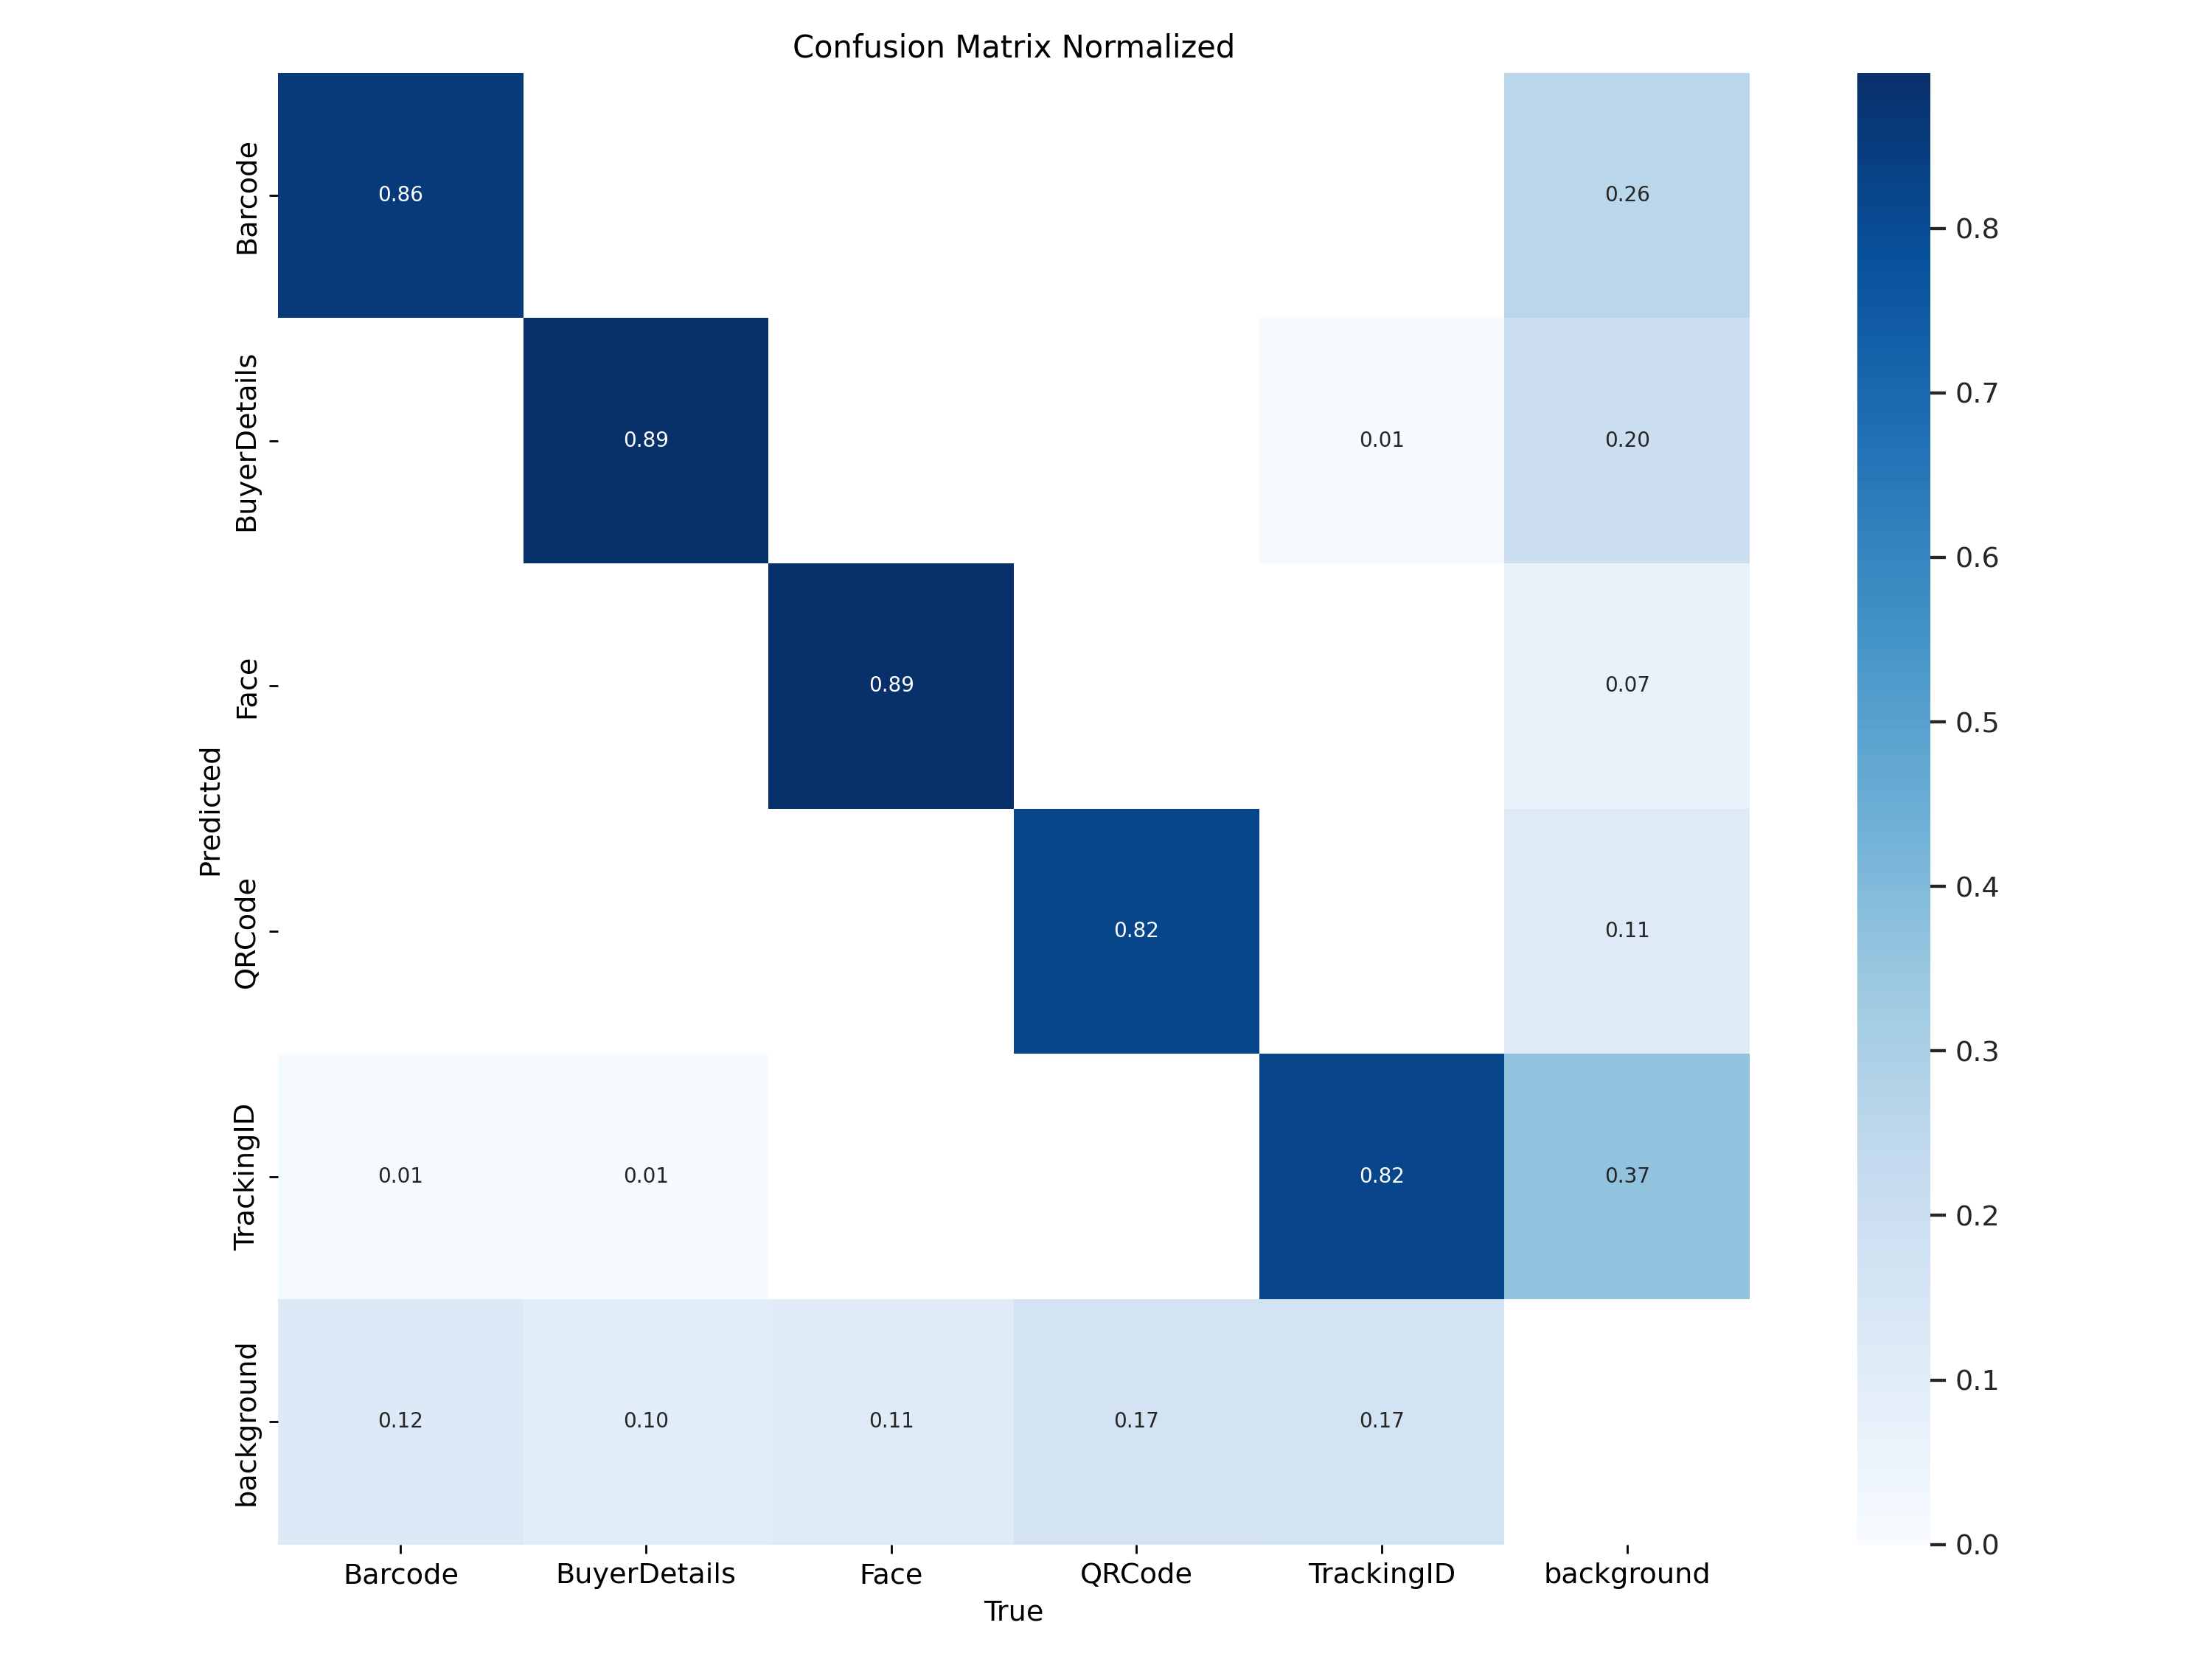

In [14]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=600)

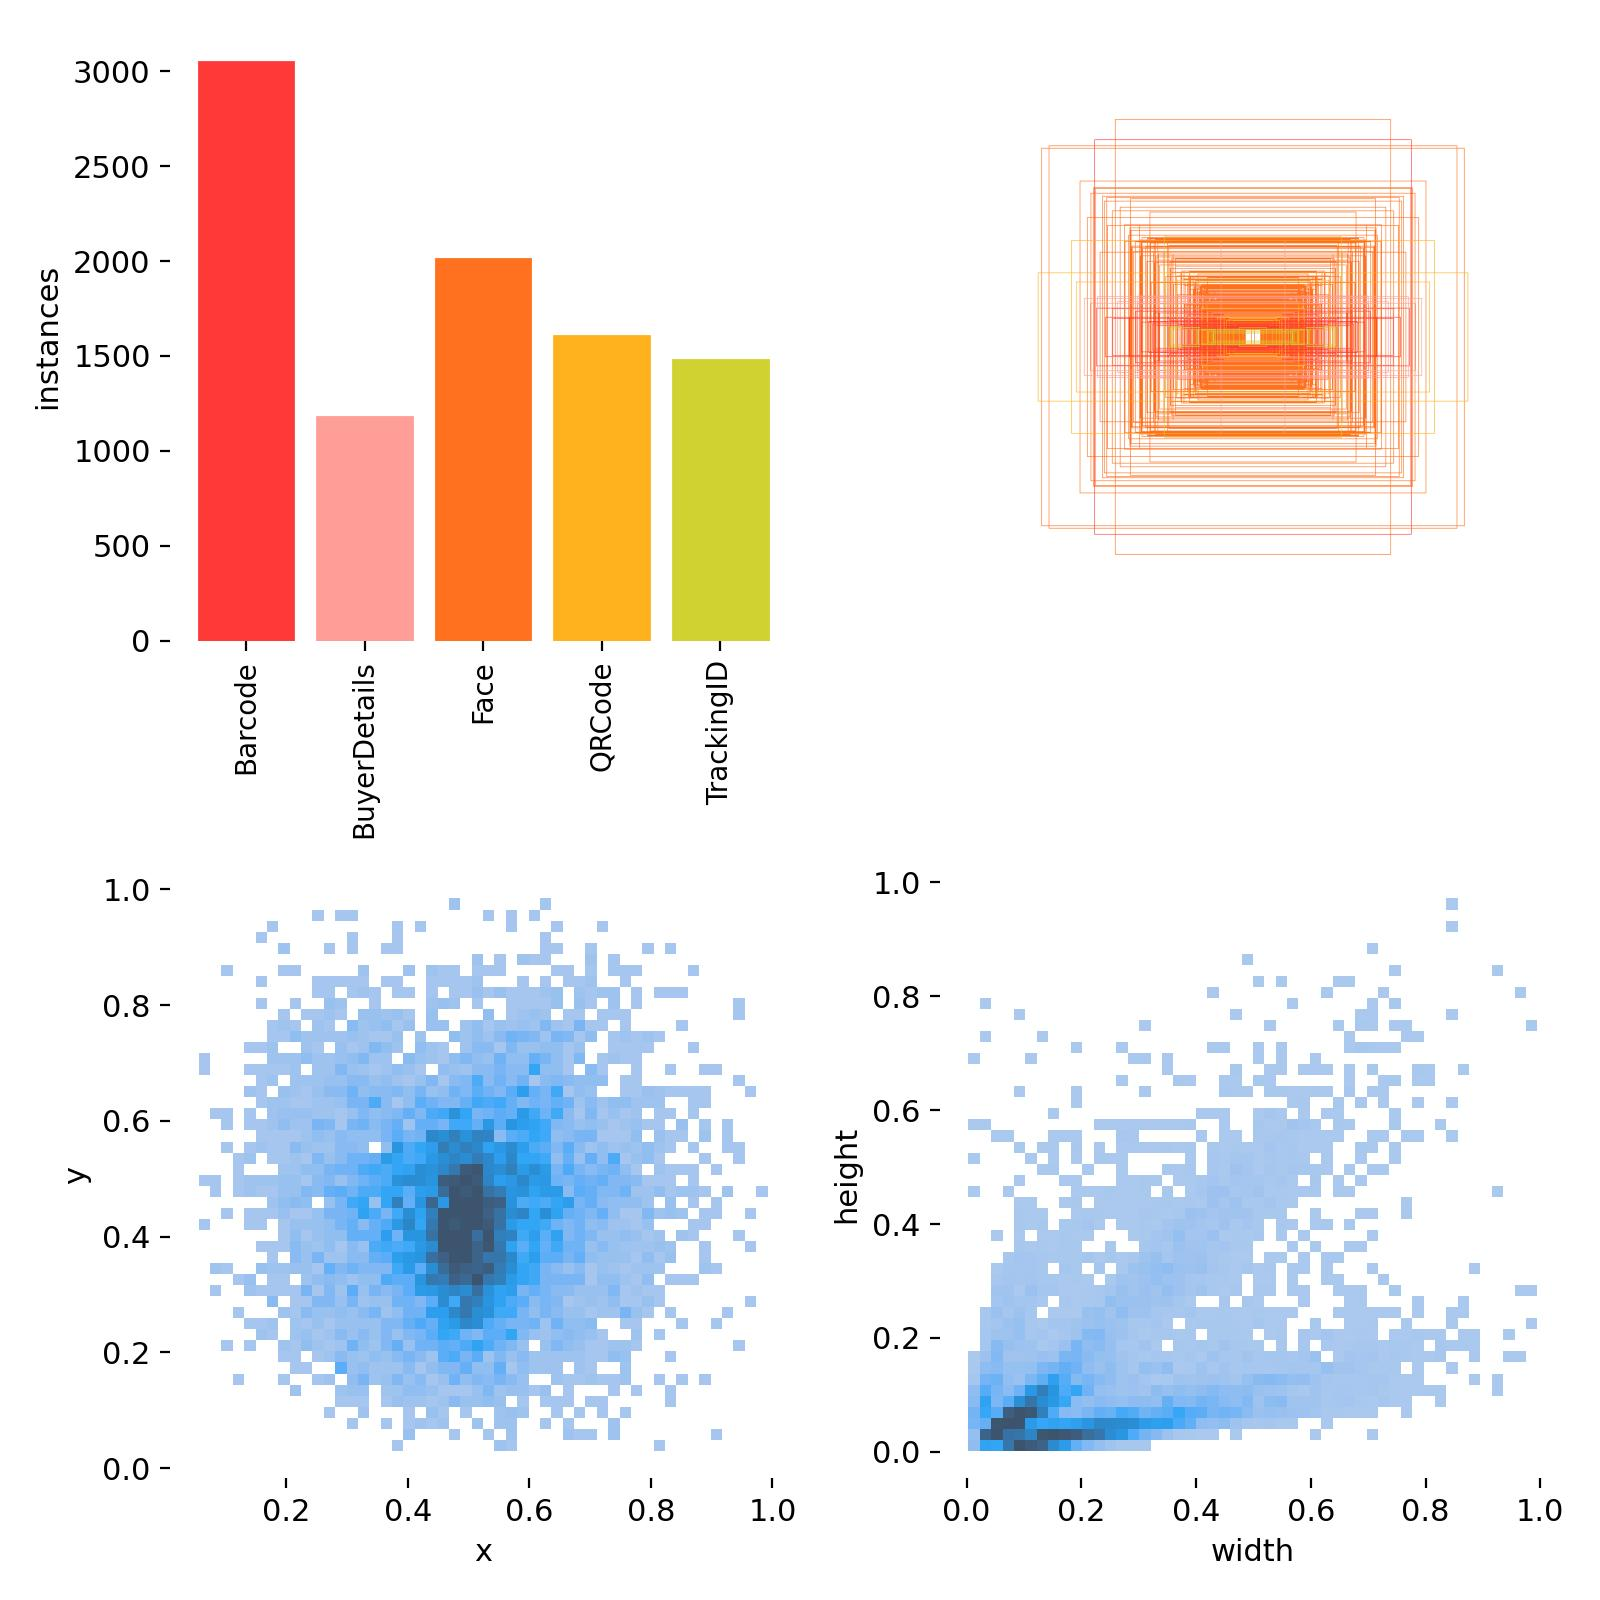

In [15]:
Image(filename=f'/content/runs/detect/train/labels.jpg', width=600)

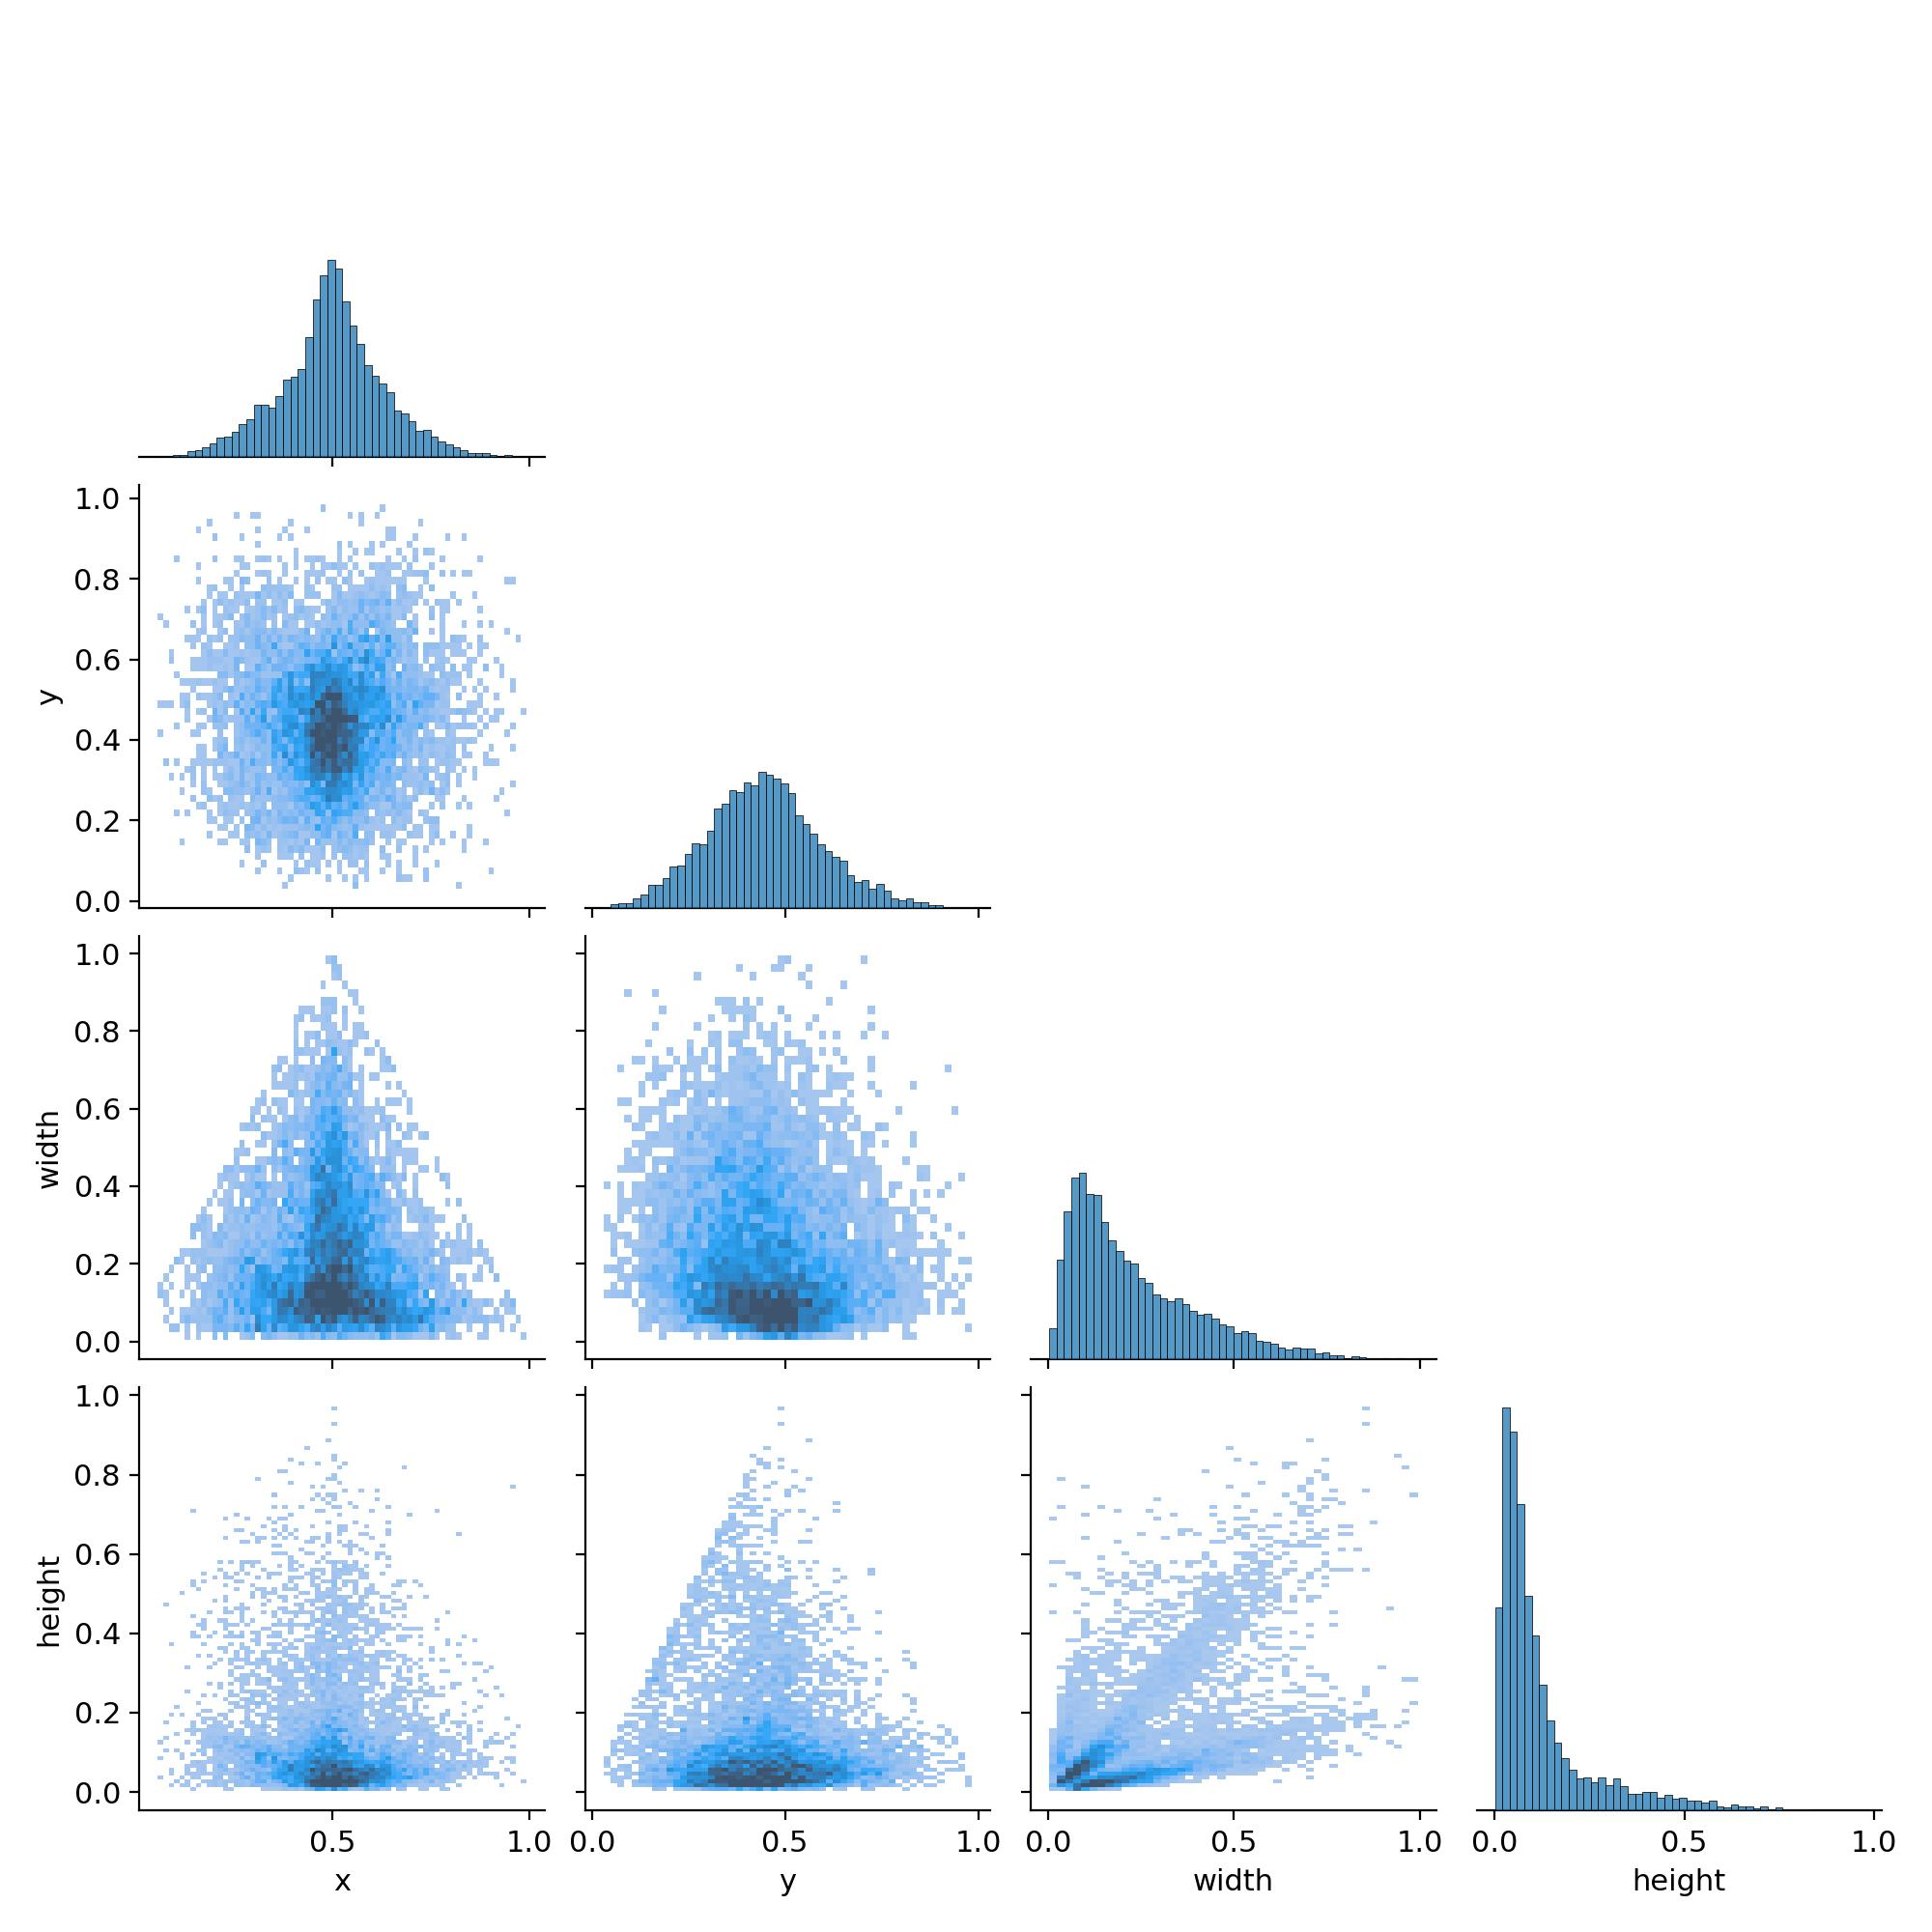

In [16]:
Image(filename=f'/content/runs/detect/train/labels_correlogram.jpg', width=600)

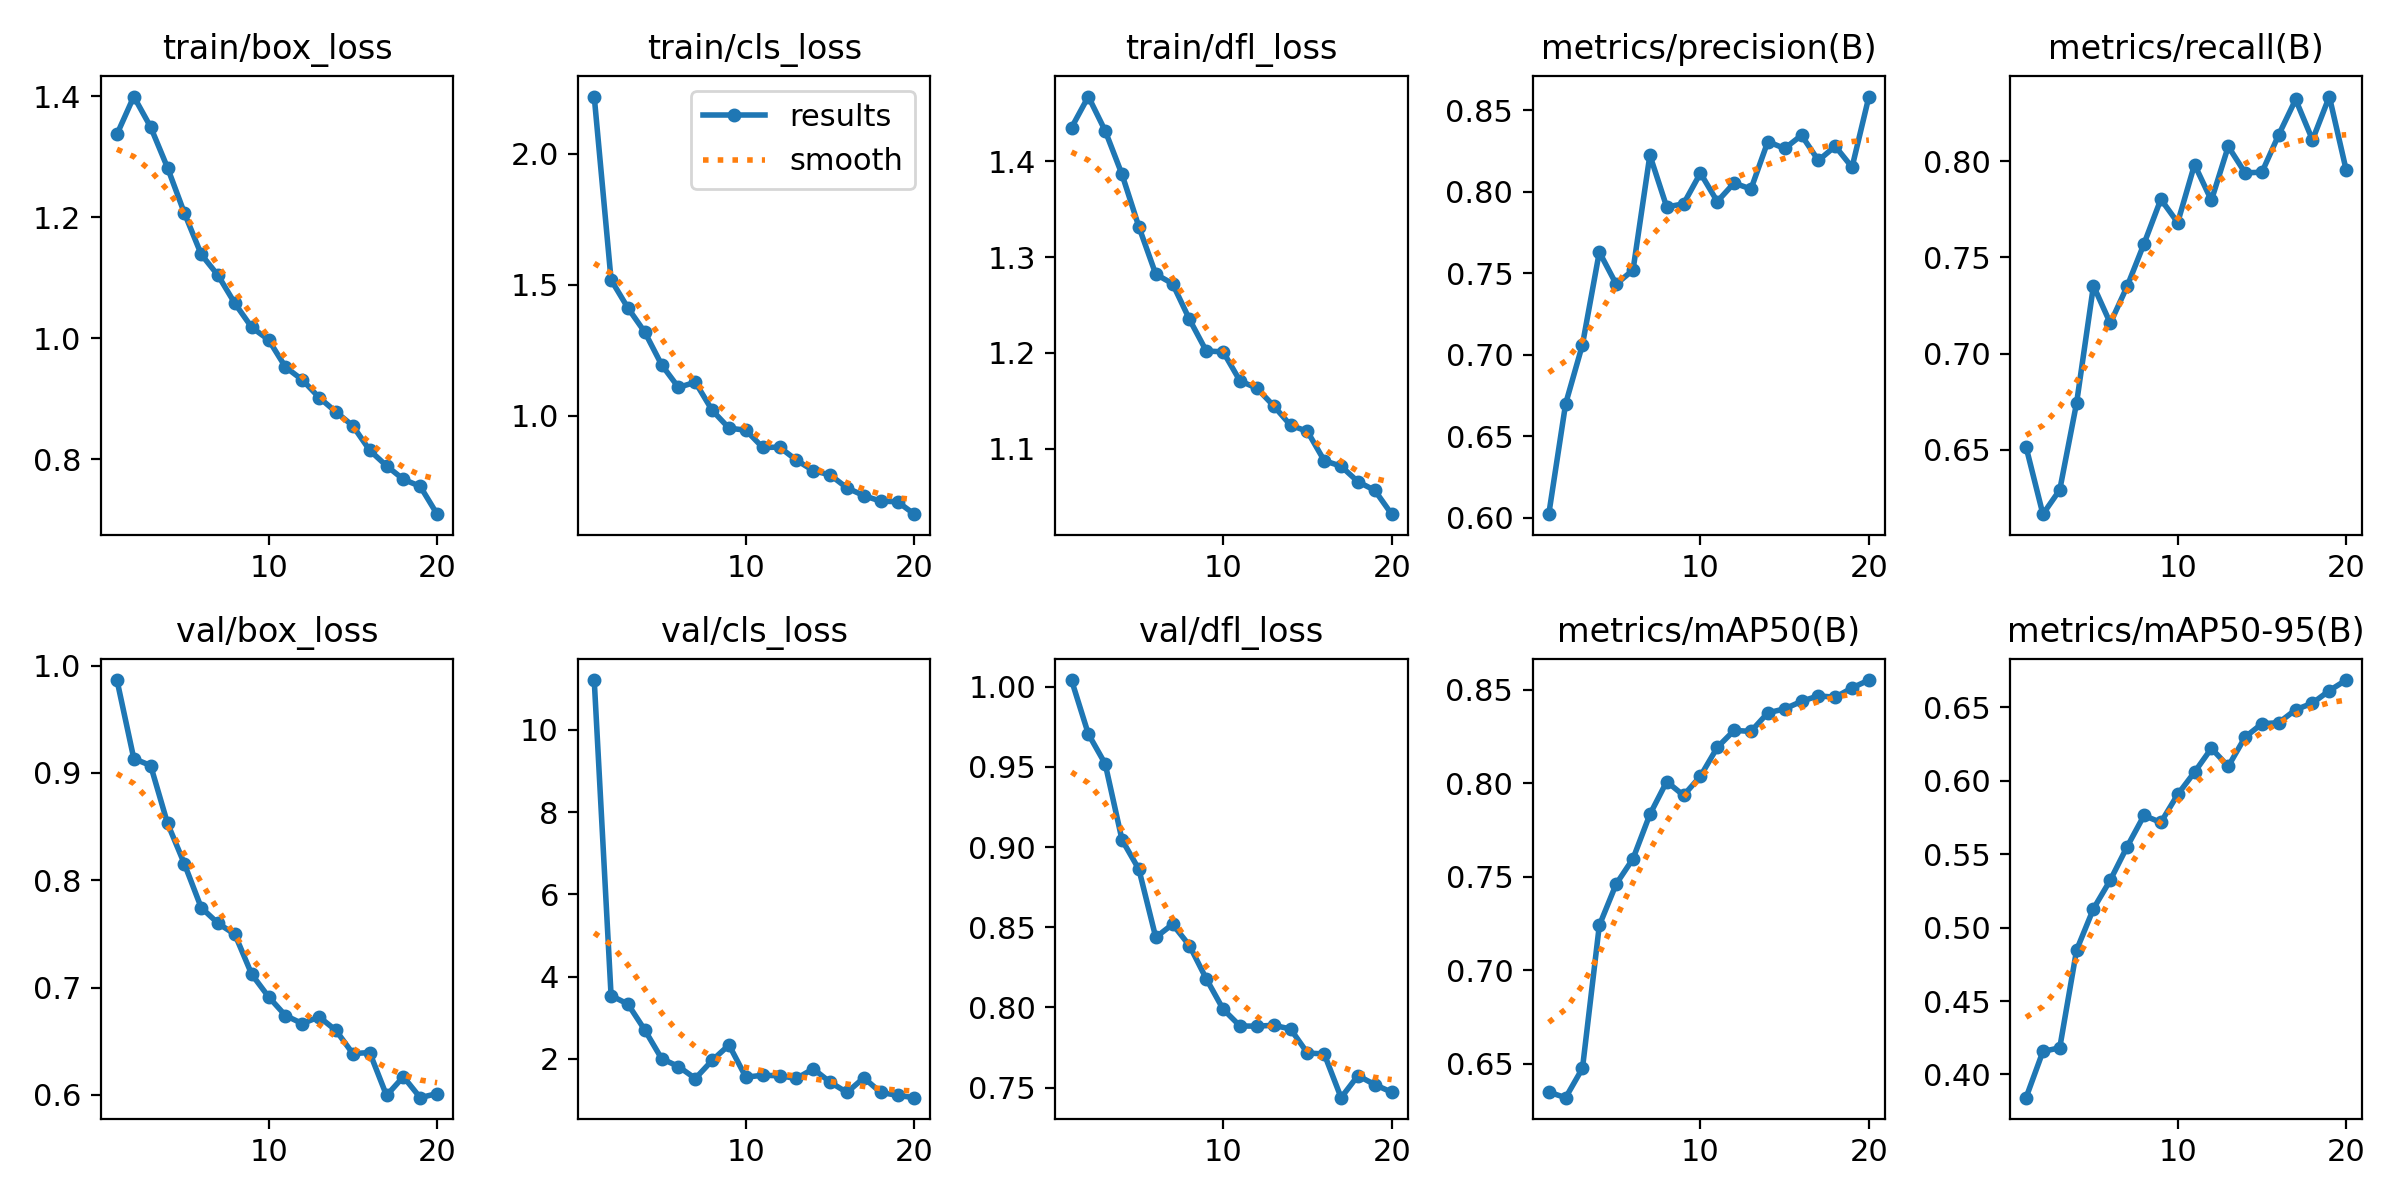

In [17]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

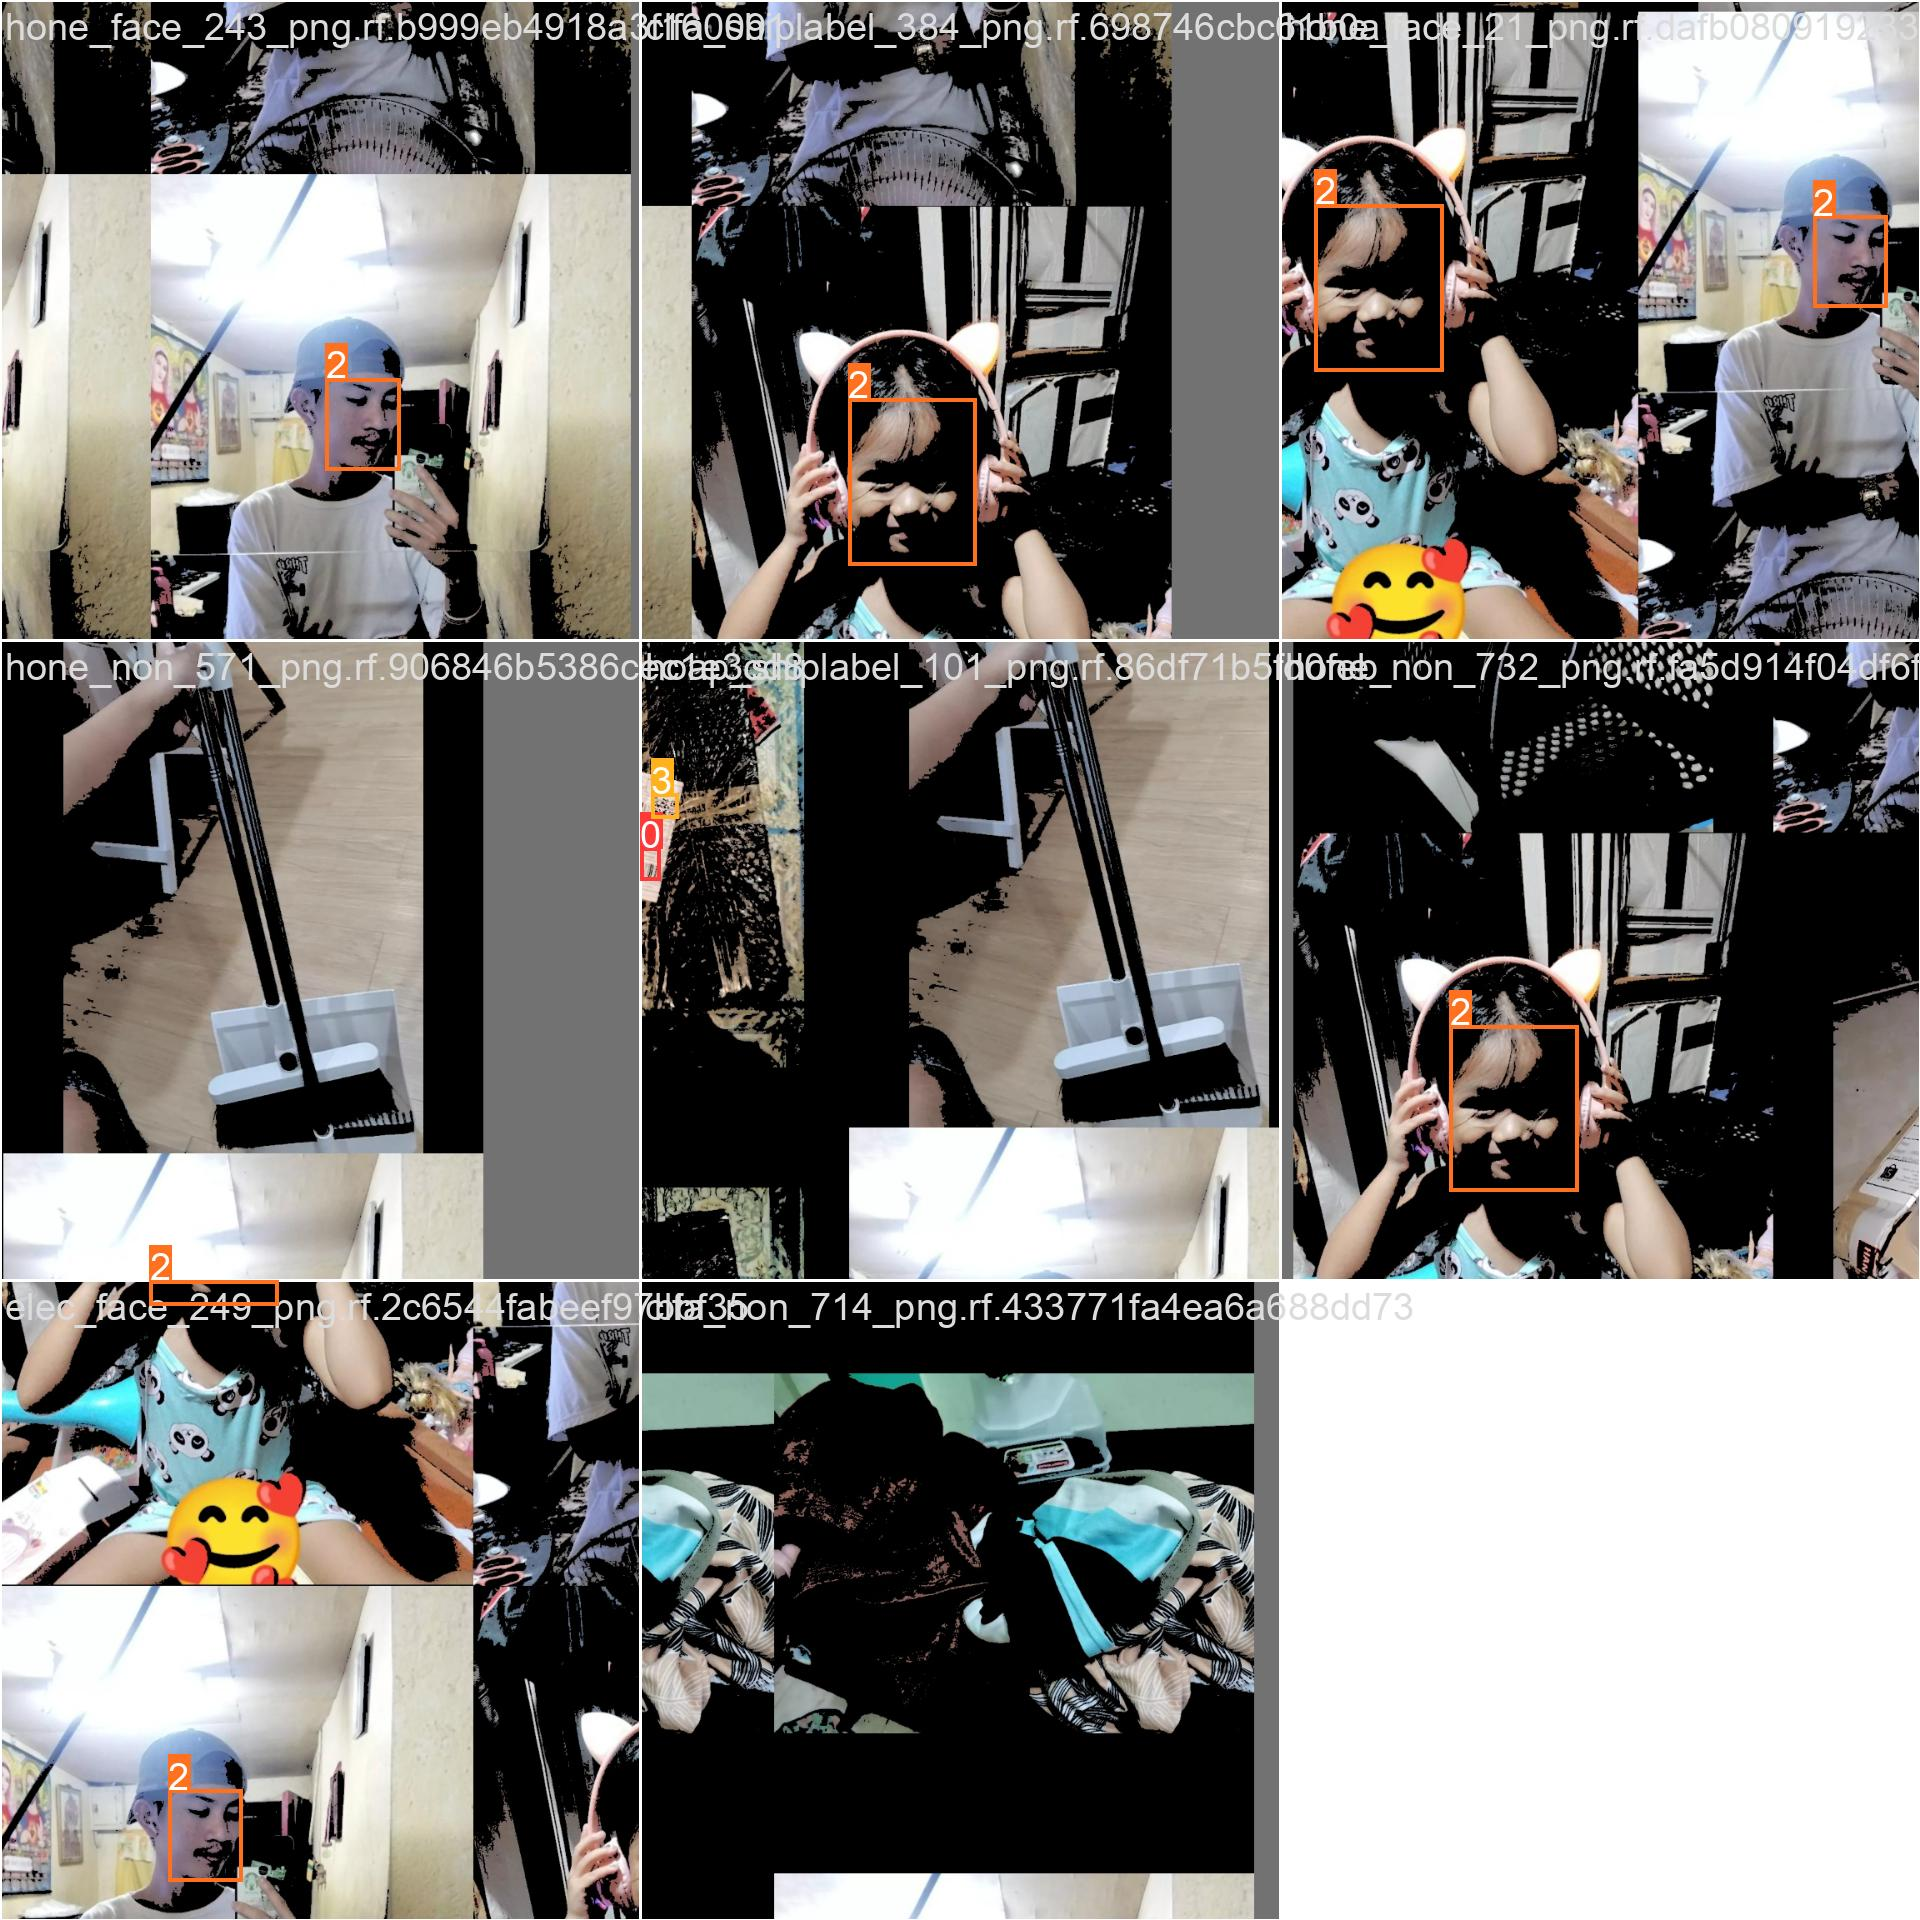

In [18]:
Image(filename=f'/content/runs/detect/train/train_batch0.jpg', width=600)

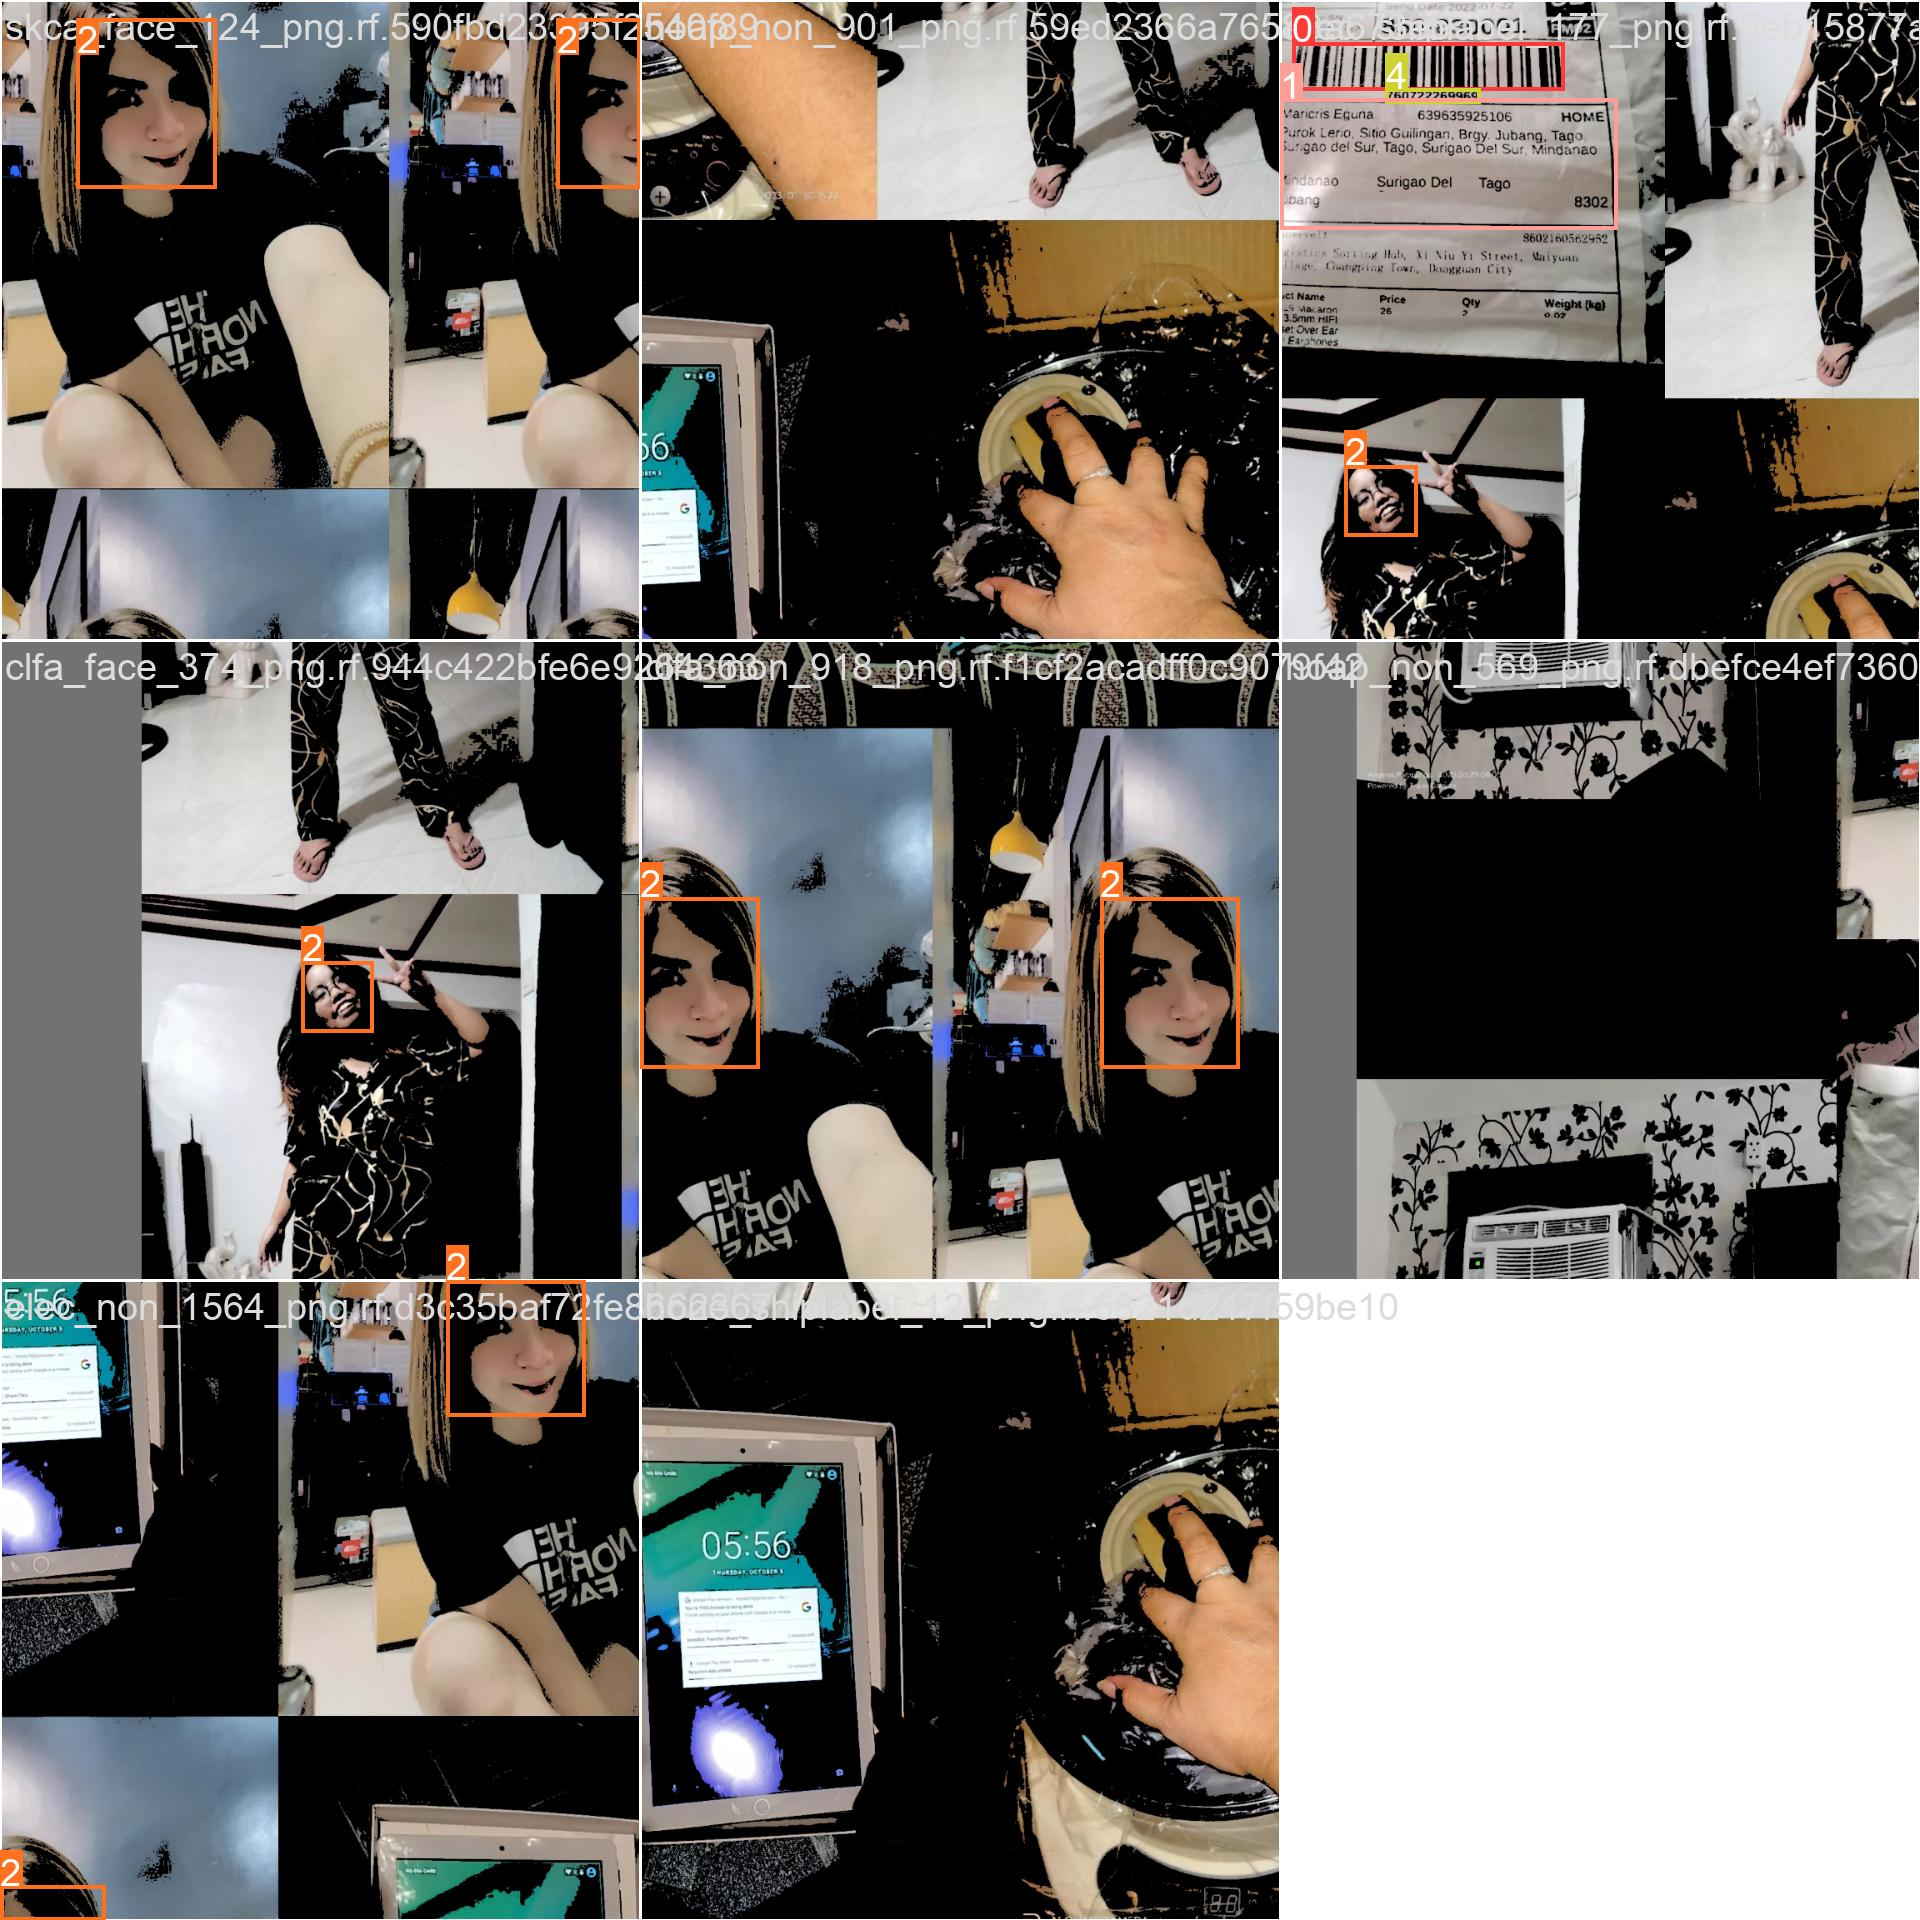

In [19]:
Image(filename=f'/content/runs/detect/train/train_batch1.jpg', width=600)

In [20]:
Image(filename=f'/content/runs/detect/train/train_batch5010.jpg', width=600)

FileNotFoundError: ignored

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch5011.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch5012.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_labels.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch1_labels.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch1_pred.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch2_labels.jpg', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch2_pred.jpg', width=600)

In [ ]:
model_path = '/content/runs/detect/train/weights'
data_yaml_path = '/content/YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/data.yaml'

model.val(data=data_yaml_path)

In [ ]:
from ultralytics import YOLO

# Initialize the YOLOv8 model with the checkpoint file
model = YOLO('yolov8m.pt')

# Specify the path to your data.yaml file after unzipping the archive
data_yaml_path = '/content/YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/data.yaml'
model_path = '/content/runs/detect/train/weights'
data_yaml_path = '/content/YOLOV8Dataset.downsample/YOLOV8Dataset.downsample/data.yaml'

model.eval()

import torch
from torchvision import transforms
from PIL import Image
from ultralytics import YOLO  # Import your YOLOv8 model implementation
import yaml

# Load YOLOv8 model
# Initialize the YOLOv8 model with the checkpoint file
model = YOLO('yolov8m.pt')
 # Replace with your YOLOv8 model instantiation code
model.load_state_dict(torch.load('/content/runs/detect/train/weights/best.pt'))  # Load pre-trained weights
model.eval()

# Load the test dataset YAML file
with open('/path/to/your/data.yaml', 'r') as file:
    data_config = yaml.safe_load(file)

# Define the transformation for input images (adjust according to your dataset)
transform = transforms.Compose([
    transforms.ToTensor(),
    # Add more transformations if needed
])

# Create the test dataset
test_dataset = CustomDataset(data_config['test'], transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Evaluate on the test set
with torch.no_grad():
    for inputs, targets in test_dataloader:
        # Process inputs (e.g., normalization) before passing them to the model
        inputs = preprocess_inputs(inputs)

        # Forward pass to get predictions
        predictions = model(inputs)

        # Process predictions and targets to calculate evaluation metrics
        # Implement post-processing functions to decode YOLOv8 predictions

        # Update performance metrics accordingly
        update_metrics(predictions, targets)

# Print or log the evaluation metrics
print("Evaluation Metrics:")
print_metrics()

# Optionally, visualize some results
# Add code to visualize predictions and ground truth for a few examples from the test set
visualize_results(test_dataset, model)

In [ ]:
model.eval

In [ ]:
import subprocess

# Define the YOLO command
yolo_command = 'yolo task=detect mode=export model=/content/runs/detect/train/weights/best.pt format=onnx simplify=True opset=13 imgsz=768'

# Run the YOLO command using subprocess
process = subprocess.Popen(yolo_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
stdout, stderr = process.communicate()

# Print the command output
print("Standard Output:")
print(stdout.decode())
print("Standard Error:")
print(stderr.decode())


Converting the Weights to NCNN Format

https://convertmodel.com/

In [ ]:
import shutil

# Compress the folder using shutil.make_archive
shutil.make_archive("/content/runs", 'zip', "/content", "runs")

# Move the compressed file to the correct location
shutil.move("/content/runs.zip", "/content/runs1.zip")

# Download the zip file
from google.colab import files
files.download("/content/runs1.zip")
